In [4160]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Début

In [4161]:
# ouverture du fichier cvs
df = pd.read_csv('train.csv')
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


6019 lignes et 13 colonnes

In [4162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


- Colonne 'New_Price' a beaucoup de valeurs manquantes

In [4163]:
# Vérification des doublons
df.duplicated().sum()

np.int64(0)

- pas de doublons dans les valeurs

In [4164]:
# Colonne Name
print('Colonne Name : \n')
print('Doublons : ', df['Name'].duplicated().sum())

print('Name : ', df['Name'].value_counts(), '\n')
df['Name'].sort_values().unique().tolist()



Colonne Name : 

Doublons :  4143
Name :  Name
Mahindra XUV500 W8 2WD                     49
Maruti Swift VDI                           45
Maruti Swift Dzire VDI                     34
Honda City 1.5 S MT                        34
Maruti Swift VDI BSIV                      31
                                           ..
Tata New Safari EX 4x2                      1
Nissan Terrano XL Plus ICC WT20 SE          1
Honda Brio 1.2 S Option MT                  1
Volkswagen Vento Konekt Diesel Highline     1
Lamborghini Gallardo Coupe                  1
Name: count, Length: 1876, dtype: int64 



['Ambassador Classic Nova Diesel',
 'Audi A3 35 TDI Attraction',
 'Audi A3 35 TDI Premium',
 'Audi A3 35 TDI Premium Plus',
 'Audi A3 35 TDI Technology',
 'Audi A4 1.8 TFSI',
 'Audi A4 1.8 TFSI Technology Edition',
 'Audi A4 2.0 TDI',
 'Audi A4 2.0 TDI 177 Bhp Premium Plus',
 'Audi A4 2.0 TDI 177 Bhp Technology Edition',
 'Audi A4 2.0 TDI Celebration Edition',
 'Audi A4 2.0 TDI Multitronic',
 'Audi A4 2.0 TDI Premium Sport Limited Edition',
 'Audi A4 2.0 TFSI',
 'Audi A4 3.0 TDI Quattro',
 'Audi A4 3.0 TDI Quattro Premium',
 'Audi A4 3.2 FSI Tiptronic Quattro',
 'Audi A4 30 TFSI Premium Plus',
 'Audi A4 35 TDI Premium',
 'Audi A4 35 TDI Premium Plus',
 'Audi A4 35 TDI Premium Sport',
 'Audi A4 35 TDI Technology',
 'Audi A4 35 TDI Technology Edition',
 'Audi A4 New 2.0 TDI Multitronic',
 'Audi A6 2.0 TDI Design Edition',
 'Audi A6 2.7 TDI',
 'Audi A6 2.8 FSI',
 'Audi A6 2011-2015 2.0 TDI',
 'Audi A6 2011-2015 2.0 TDI Premium Plus',
 'Audi A6 2011-2015 2.0 TDI Technology',
 'Audi A6 2011

In [4165]:
# Colonne Year
print('Colonne Year : \n')
print('Doublons : ', df['Year'].duplicated().sum())

print('Années triées par nombre de fois d apparition : ', df['Year'].value_counts(), '\n')


print(df['Year'].min(), df['Year'].max())


Colonne Year : 

Doublons :  5997
Années triées par nombre de fois d apparition :  Year
2014    797
2015    744
2016    741
2013    649
2017    587
2012    580
2011    466
2010    342
2018    298
2009    198
2008    174
2007    125
2019    102
2006     78
2005     57
2004     31
2003     17
2002     15
2001      8
2000      4
1998      4
1999      2
Name: count, dtype: int64 

1998 2019


- Les années sont comprises entre 1998 et 2019

In [4166]:
# Colonne Localisation
print('Colonne Localisation : \n')
print('Doublons : ', df['Location'].duplicated().sum())

print('Type de carburant triés par nombre de fois d apparition : ', df['Location'].value_counts().sort_values(), '\n')

Colonne Localisation : 

Doublons :  6008
Type de carburant triés par nombre de fois d apparition :  Location
Ahmedabad     224
Bangalore     358
Jaipur        413
Chennai       494
Kolkata       535
Delhi         554
Pune          622
Coimbatore    636
Kochi         651
Hyderabad     742
Mumbai        790
Name: count, dtype: int64 



- type catégoriel : a voir les corrélations (11 localisations)

In [4167]:
# Colonne Seats
print('Colonne Seats : \n')
print('Doublons : ', df['Seats'].duplicated().sum())

print('Type de carburant triés par nombre de fois d apparition : ', df['Seats'].value_counts().sort_values(), '\n')

Colonne Seats : 

Doublons :  6009
Type de carburant triés par nombre de fois d apparition :  Seats
0.0        1
9.0        3
10.0       5
2.0       16
6.0       31
4.0       99
8.0      134
7.0      674
5.0     5014
Name: count, dtype: int64 



- Il y a une voiture qui n'a aucun siège...

In [4168]:
df[df['Seats'] == 0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5 kmpl,3197 CC,null bhp,0.0,NaN,18.0


In [4169]:
df[df['Name'] == 'Audi A4 3.2 FSI Tiptronic Quattro']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5 kmpl,3197 CC,null bhp,0.0,NaN,18.0


In [4170]:
df[(df['Name'].str.contains('Audi A4 3'))]


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
103,Audi A4 3.0 TDI Quattro Premium,Kolkata,2010,30000,Diesel,Automatic,First,14.94 kmpl,2967 CC,241.4 bhp,5.0,NaN,9.80
1044,Audi A4 35 TDI Technology,Hyderabad,2015,45000,Diesel,Automatic,First,18.25 kmpl,1968 CC,187.74 bhp,5.0,55.61 Lakh,25.00
1637,Audi A4 35 TDI Premium,Coimbatore,2016,68193,Diesel,Automatic,First,17.11 kmpl,1968 CC,174.33 bhp,5.0,NaN,24.74
1900,Audi A4 3.0 TDI Quattro Premium,Coimbatore,2012,46913,Diesel,Automatic,First,14.94 kmpl,2967 CC,241.4 bhp,5.0,NaN,16.11
2114,Audi A4 35 TDI Premium,Hyderabad,2015,50000,Diesel,Automatic,First,17.11 kmpl,1968 CC,174.33 bhp,5.0,NaN,25.00
2484,Audi A4 35 TDI Premium Sport,Chennai,2016,11000,Diesel,Automatic,First,17.11 kmpl,1968 CC,174.33 bhp,5.0,NaN,28.00
2506,Audi A4 35 TDI Premium,Coimbatore,2016,39644,Diesel,Automatic,First,17.11 kmpl,1968 CC,174.33 bhp,5.0,NaN,25.75
3158,Audi A4 30 TFSI Premium Plus,Kochi,2017,61221,Petrol,Automatic,First,17.84 kmpl,1395 CC,147.51 bhp,5.0,47.16 Lakh,21.73
3535,Audi A4 35 TDI Premium,Coimbatore,2016,39237,Diesel,Automatic,First,17.11 kmpl,1968 CC,174.33 bhp,5.0,NaN,25.64
3730,Audi A4 35 TDI Premium,Bangalore,2015,58970,Diesel,Automatic,First,17.11 kmpl,1968 CC,174.33 bhp,5.0,NaN,23.75


- D'après la recherche on pourrait mettre que c'est une 5 places mais il y a aussi une valeur manquante dans Power, garde-t-on cette ligne ? on garde la ligne, on met seats = 5, il faut remplir le power


In [4171]:
# Colonne Type fuel
print('Colonne Fuel_Type : \n')
print('Doublons : ', df['Fuel_Type'].duplicated().sum())

print('Type de carburant triés par nombre de fois d apparition : ', df['Fuel_Type'].value_counts().sort_values(), '\n')

Colonne Fuel_Type : 

Doublons :  6014
Type de carburant triés par nombre de fois d apparition :  Fuel_Type
Electric       2
LPG           10
CNG           56
Petrol      2746
Diesel      3205
Name: count, dtype: int64 



- type catégoriel : 5 types différents de carburants (pour l'application on pourra faire une liste déroulante)

In [4172]:
# Colonne Transmission
print('Colonne Transmission : \n')
print('Doublons : ', df['Transmission'].duplicated().sum())

print('Transmission triées par nombre de fois d apparition : ', df['Transmission'].value_counts().sort_values(), '\n')

Colonne Transmission : 

Doublons :  6017
Transmission triées par nombre de fois d apparition :  Transmission
Automatic    1720
Manual       4299
Name: count, dtype: int64 



- type catégoriel : 2 types de transmissions possible

In [4173]:
# Colonne Owner_Type
print('Colonne Owner_Type : \n')
print('Doublons : ', df['Owner_Type'].duplicated().sum())

print('Owner_Type triées par nombre de fois d apparition : ', df['Owner_Type'].value_counts().sort_values(), '\n')

Colonne Owner_Type : 

Doublons :  6015
Owner_Type triées par nombre de fois d apparition :  Owner_Type
Fourth & Above       9
Third              113
Second             968
First             4929
Name: count, dtype: int64 



- type catégoriel : 4 catégories possibles. Sera encodé avec LabelEncoder

In [4174]:
df[['nb_power', 'type_power']] = df['Power'].str.rsplit(' ', n=1, expand=True)
df['type_power'].value_counts()

type_power
bhp    5983
Name: count, dtype: int64

- il n'y a qu'un seul type de puissance donc nous n'avons pas besoin de ces 2 nouvelles colonnes

In [4175]:
df.drop(['nb_power', 'type_power'], axis=1, inplace=True)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [4176]:
df[['nb_engine', 'type_engine']] = df['Engine'].str.rsplit(' ', n=1, expand=True)
df['type_engine'].value_counts()

type_engine
CC    5983
Name: count, dtype: int64

- il n'y a qu'un seul type de engine donc nous n'avons pas besoin de ces 2 nouvelles colonnes

In [4177]:
df.drop(['nb_engine', 'type_engine'], axis=1, inplace=True)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [4178]:
df['Engine'] = df['Engine'].str.replace("CC", "")
df['Power'] = df['Power'].str.replace("bhp", "")
df['Mileage'] = df['Mileage'].str.replace("km/kg", "")
df['Mileage'] = df['Mileage'].str.replace("kmpl", "")
df.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,NaN,17.74


In [4179]:
# Convertir Engine, Power, et nb_mileage en numérique
df["Engine"] = pd.to_numeric(df['Engine'], errors='coerce')
df["Power"] = pd.to_numeric(df['Power'], errors='coerce')
df["Mileage"] = pd.to_numeric(df['Mileage'], errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             5983 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 611.4+ KB


# VALEURS MANQUANTES

In [4181]:
def trouver_voiture_similaire(df, nom_voiture, fuel_type, transmission):
    """
    Recherche un véhicule similaire dans le DataFrame `df` en réduisant progressivement 
    le nom de la voiture jusqu'à ce qu'au moins une correspondance soit trouvée.
    La recherche prend également en compte le type de carburant et la transmission.
    
    Args:
    - df (DataFrame) : Le DataFrame contenant les données des véhicules.
    - nom_voiture (str) : Le nom du véhicule à rechercher.
    - fuel_type (str) : Le type de carburant du véhicule recherché.
    - transmission (str) : Le type de transmission du véhicule recherché.
    
    Returns:
    - DataFrame contenant les véhicules similaires trouvés, ou un DataFrame vide si aucun n'est trouvé.
    """   
    # Découper le nom du véhicule en une liste de mots
    name_parts = nom_voiture.split(' ')
    
    similar_cars = pd.DataFrame()  # Initialisation d'un DataFrame vide pour stocker les résultats
    found_similar_car = False  # Indicateur pour suivre si une voiture similaire a été trouvée
    
    # Réduction progressive du nom jusqu'à trouver au moins un autre véhicule similaire
    while len(similar_cars) < 2 and len(name_parts) > 0:
        # Rechercher des voitures ayant un nom similaire (partie du nom), même carburant et même transmission
        similar_cars = df[
            (df['Name'].str.contains(' '.join(name_parts), na=False)) & 
            (df['Fuel_Type'] == fuel_type) & 
            (df['Transmission'] == transmission)
        ]
        
        # Si au moins 2 véhicules (lui-même + un autre) sont trouvés, on arrête la recherche
        if len(similar_cars) >= 2:
            found_similar_car = True
            break
        
        # Réduction du nom en supprimant le dernier mot et on réessaie
        name_parts.pop()
        
    # Retourner les véhicules similaires trouvés si au moins un autre a été trouvé
    if found_similar_car:
        return similar_cars
    else:
        return pd.DataFrame()  # Aucun véhicule similaire trouvé, on retourne un DataFrame vide


def remplir_valeurs_manquantes(df):
    """
    Remplit les valeurs manquantes des colonnes ['Mileage', 'Engine', 'Power', 'Seats'] 
    en recherchant des véhicules similaires. Si aucun véhicule similaire n'est trouvé, 
    la valeur manquante est remplie avec la médiane de la colonne.
    
    Args:
    - df (DataFrame) : Le DataFrame contenant les données des véhicules.
    
    Returns:
    - DataFrame avec les valeurs manquantes complétées.
    """  
    for index, row in df.iterrows():
        # Liste des colonnes à compléter
        list_colonnes = ['Mileage', 'Engine', 'Power', 'Seats']
        
        for col in list_colonnes:
            # Vérifier si la valeur dans la cellule est manquante (NaN)
            if pd.isnull(row[col]):  
                # Rechercher des véhicules similaires avec le même carburant et transmission
                similar_cars = trouver_voiture_similaire(df, row['Name'], row['Fuel_Type'], row['Transmission'])  
                
                if not similar_cars.empty:
                    # Récupérer la valeur la plus fréquente (mode) pour la colonne en question
                    mode_value = similar_cars[col].mode()
                    
                    if not mode_value.empty:  # Si un mode existe, utiliser la première valeur trouvée
                        df.at[index, col] = mode_value.iloc[0]  
                    else:  # Si aucun mode n'est trouvé, utiliser la médiane de la colonne entière
                        df.at[index, col] = df[col].median()  
                else:
                    # Si aucune voiture similaire n'est trouvée, remplir avec la médiane de la colonne
                    df.at[index, col] = df[col].median()  
    return df


# Appliquer la fonction sur le DataFrame
data = remplir_valeurs_manquantes(df)

# Vérifier si des valeurs manquantes subsistent
print(data.isnull().sum())


Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            5195
Price                   0
dtype: int64


In [4186]:
def remplacer_outliers(df):
    # Liste des colonnes à traiter
    list_colonnes = ['Mileage', 'Engine', 'Power', 'Seats', 'Kilometers_Driven']
   
    # Définir une fonction pour détecter les outliers avec l'IQR (Interquartile Range)
    def detecter_outliers(colonne):
        Q1 = colonne.quantile(0.25)
        Q3 = colonne.quantile(0.75)
        IQR = Q3 - Q1
        # Définir les bornes inférieure et supérieure
        borne_inf = Q1 - 1.5 * IQR
        borne_sup = Q3 + 1.5 * IQR
        return (colonne < borne_inf) | (colonne > borne_sup)
   
    for index, row in df.iterrows():
        for col in list_colonnes:
            # Vérifier si la valeur est un outlier
            if detecter_outliers(df[col]).iloc[index]:  
                # Rechercher des véhicules similaires avec le même carburant et transmission
                similar_cars = trouver_voiture_similaire(df, row['Name'], row['Fuel_Type'], row['Transmission'])  
                if not similar_cars.empty:
                    # Récupérer la valeur la plus fréquente (mode) pour la colonne en question
                    mode_value = similar_cars[col].mode()
                    if not mode_value.empty:  # Si un mode existe, utiliser la première valeur trouvée
                        df.at[index, col] = mode_value.iloc[0]  
                    else:  # Si aucun mode n'est trouvé, utiliser la médiane de la colonne entière
                        df.at[index, col] = df[col].median()  
                else:
                    # Si aucune voiture similaire n'est trouvée, remplir avec la médiane de la colonne
                    df.at[index, col] = df[col].median()  
 
    return df

data = remplacer_outliers(data)


C:\Users\laetitia.monnier\AppData\Local\Temp\ipykernel_20608\2009903995.py:26: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  (df['Name'].str.contains(' '.join(name_parts), na=False)) &
C:\Users\laetitia.monnier\AppData\Local\Temp\ipykernel_20608\2009903995.py:26: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  (df['Name'].str.contains(' '.join(name_parts), na=False)) &
C:\Users\laetitia.monnier\AppData\Local\Temp\ipykernel_20608\2009903995.py:26: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  (df['Name'].str.contains(' '.join(name_parts), na=False)) &
C:\Users\laetitia.monnier\AppData\Local\Temp\ipykernel_20608\2009903995.py:26: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually

<Axes: >

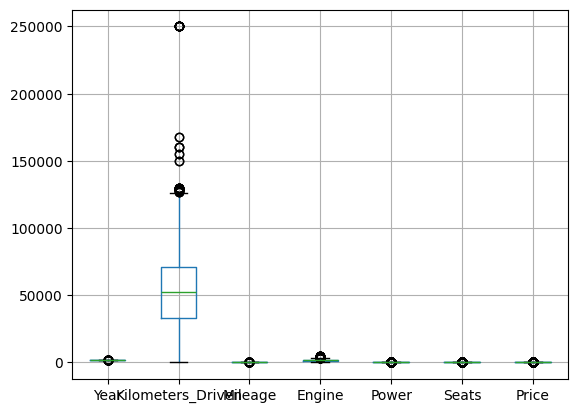

In [4187]:
data.boxplot()

In [4064]:
# Valeurs manquantes
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                 143
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [4066]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[(df['Name'].str.startswith('Honda City 1.5 EXI', na=False))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
421,Honda City 1.5 EXI S,Mumbai,2013,52576,Petrol,Manual,First,13.0,1493.0,100.0,5.0,NaN,4.35
1279,Honda City 1.5 EXI,Pune,2005,98437,Petrol,Manual,First,13.0,1493.0,100.0,5.0,NaN,1.15
1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.0,1493.0,100.0,NaN,NaN,1.70
3068,Honda City 1.5 EXI AT,Kochi,2006,99583,Petrol,Automatic,Third,12.0,1493.0,100.0,5.0,NaN,2.21
3721,Honda City 1.5 EXI,Jaipur,2005,123000,Petrol,Manual,Third,13.0,1493.0,100.0,5.0,NaN,1.10
3806,Honda City 1.5 EXI,Pune,2001,125943,Petrol,Manual,Second,13.0,1493.0,100.0,5.0,NaN,1.45
5957,Honda City 1.5 EXI,Coimbatore,2004,186679,Petrol,Manual,Second,13.0,1493.0,100.0,5.0,NaN,1.76


In [3949]:
# Remplir 'Seats' pour Honda City 1.5 EXI
df.loc[df['Name'] == 'Honda City 1.5 EXI', 'Seats'] = 5.0
df[(df['Name'].str.startswith('Honda City 1.5 EXI', na=False))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
421,Honda City 1.5 EXI S,Mumbai,2013,52576,Petrol,Manual,First,13.0,1493.0,100.0,5.0,NaN,4.35
1279,Honda City 1.5 EXI,Pune,2005,98437,Petrol,Manual,First,13.0,1493.0,100.0,5.0,NaN,1.15
1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.0,1493.0,100.0,5.0,NaN,1.70
3068,Honda City 1.5 EXI AT,Kochi,2006,99583,Petrol,Automatic,Third,12.0,1493.0,100.0,5.0,NaN,2.21
3721,Honda City 1.5 EXI,Jaipur,2005,123000,Petrol,Manual,Third,13.0,1493.0,100.0,5.0,NaN,1.10
3806,Honda City 1.5 EXI,Pune,2001,125943,Petrol,Manual,Second,13.0,1493.0,100.0,5.0,NaN,1.45
5957,Honda City 1.5 EXI,Coimbatore,2004,186679,Petrol,Manual,Second,13.0,1493.0,100.0,5.0,NaN,1.76


In [3950]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[(df['Name'].str.startswith('Ford Figo Diesel', na=False))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
61,Ford Figo Diesel Titanium,Bangalore,2010,72000,Diesel,Manual,First,20.0,1399.0,68.00,5.0,NaN,2.75
83,Ford Figo Diesel ZXI,Hyderabad,2012,70337,Diesel,Manual,First,20.0,1399.0,68.00,5.0,NaN,2.80
167,Ford Figo Diesel Titanium,Jaipur,2010,66123,Diesel,Manual,Second,20.0,1399.0,68.00,5.0,NaN,2.10
192,Ford Figo Diesel ZXI,Chennai,2010,120000,Diesel,Manual,First,20.0,1399.0,68.00,5.0,NaN,2.60
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498.0,99.00,NaN,NaN,3.60
234,Ford Figo Diesel EXI,Kolkata,2012,41284,Diesel,Manual,First,20.0,1399.0,68.05,5.0,NaN,2.50
481,Ford Figo Diesel EXI,Chennai,2011,75000,Diesel,Manual,Second,20.0,1399.0,68.00,5.0,NaN,2.25
698,Ford Figo Diesel ZXI,Jaipur,2010,100002,Diesel,Manual,Third,20.0,1399.0,68.00,5.0,NaN,1.28
781,Ford Figo Diesel EXI,Coimbatore,2014,74980,Diesel,Manual,First,20.0,1399.0,68.00,5.0,NaN,4.08
835,Ford Figo Diesel Titanium,Pune,2015,92000,Diesel,Manual,First,20.0,1399.0,68.05,5.0,NaN,4.25


In [3951]:
# Remplir 'Seats' pour Honda City 1.5 EXI
df.loc[df['Name'] == 'Ford Figo Diesel', 'Seats'] = 5.0
df[(df['Name'].str.startswith('Ford Figo Diesel', na=False))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
61,Ford Figo Diesel Titanium,Bangalore,2010,72000,Diesel,Manual,First,20.0,1399.0,68.00,5.0,NaN,2.75
83,Ford Figo Diesel ZXI,Hyderabad,2012,70337,Diesel,Manual,First,20.0,1399.0,68.00,5.0,NaN,2.80
167,Ford Figo Diesel Titanium,Jaipur,2010,66123,Diesel,Manual,Second,20.0,1399.0,68.00,5.0,NaN,2.10
192,Ford Figo Diesel ZXI,Chennai,2010,120000,Diesel,Manual,First,20.0,1399.0,68.00,5.0,NaN,2.60
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498.0,99.00,5.0,NaN,3.60
234,Ford Figo Diesel EXI,Kolkata,2012,41284,Diesel,Manual,First,20.0,1399.0,68.05,5.0,NaN,2.50
481,Ford Figo Diesel EXI,Chennai,2011,75000,Diesel,Manual,Second,20.0,1399.0,68.00,5.0,NaN,2.25
698,Ford Figo Diesel ZXI,Jaipur,2010,100002,Diesel,Manual,Third,20.0,1399.0,68.00,5.0,NaN,1.28
781,Ford Figo Diesel EXI,Coimbatore,2014,74980,Diesel,Manual,First,20.0,1399.0,68.00,5.0,NaN,4.08
835,Ford Figo Diesel Titanium,Pune,2015,92000,Diesel,Manual,First,20.0,1399.0,68.05,5.0,NaN,4.25


In [3952]:
# Valeurs manquantes dans Mileage
df[df['Mileage'].isnull()].groupby('Name').size()

Name
Mahindra E Verito D4         1
Toyota Prius 2009-2016 Z4    1
dtype: int64

In [3953]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[(df['Name'].str.startswith('Mahindra E', na=False))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58 Lakh,13.0


In [3954]:
# Valeurs manquantes dans Engine
df[df['Power'].isnull()].groupby('Name').size()


Name
Audi A4 3.2 FSI Tiptronic Quattro       1
BMW 5 Series 520d Sedan                 5
Chevrolet Optra 1.6 Elite               1
Fiat Petra 1.2 EL                       1
Fiat Punto 1.2 Dynamic                  1
                                       ..
Toyota Etios Liva GD                    5
Toyota Etios Liva V                     1
Toyota Qualis Fleet A3                  1
Toyota Qualis RS E2                     1
Volkswagen Jetta 2007-2011 1.9 L TDI    1
Length: 70, dtype: int64

In [3955]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[(df['Name'].str.startswith('Maruti Esteem', na=False))]

# Liste des colonnes à remplir
colonnes = ['Engine', 'Power', 'Seats']

# Boucle sur chaque colonne
for col in colonnes:

    # Calcul de la moyenne uniquement sur les valeurs non NaN
    valeur = df.loc[df['Name'].str.startswith('Maruti Esteem', na=False), col].mean(skipna=True)
    df.loc[(df['Name'].str.startswith('Maruti Esteem', na=False)) & (df[col].isnull()), col] = valeur
    

# Vérification du résultat
df[df['Name'].str.startswith('Maruti Esteem', na=False)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
630,Maruti Esteem Vxi - BSIII,Chennai,2007,30441,Petrol,Manual,First,15.9,1298.0,85.0,5.0,NaN,1.45
3733,Maruti Esteem Vxi,Delhi,2005,69496,Petrol,Manual,First,15.9,1298.0,85.0,5.0,NaN,1.10
4351,Maruti Esteem LX BSII,Jaipur,2003,55000,Petrol,Manual,Third,15.9,1298.0,85.0,5.0,NaN,0.70
4830,Maruti Esteem Vxi,Chennai,2004,95000,Petrol,Manual,First,15.9,1298.0,85.0,5.0,NaN,0.80
5843,Maruti Esteem Vxi - BSIII,Ahmedabad,2005,81000,Petrol,Manual,Second,15.9,1298.0,85.0,5.0,NaN,0.75


In [3956]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[(df['Name'].str.startswith('Chevrolet Optra 1.6', na=False))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1463,Chevrolet Optra 1.6 LS,Mumbai,2004,98798,Petrol,Manual,First,14.7,1599.0,104.0,5.0,NaN,1.50
1555,Chevrolet Optra 1.6 Elite,Pune,2005,150000,Petrol,Manual,First,14.7,1598.0,NaN,5.0,NaN,1.50
5637,Chevrolet Optra 1.6 LT Royale,Kochi,2013,55176,Petrol,Manual,Second,17.4,1599.0,104.0,5.0,NaN,3.47


In [3957]:
# Liste des colonnes à remplir
colonnes = ['Engine', 'Power', 'Seats']

# Boucle sur chaque colonne
for col in colonnes:

    # Calcul de la moyenne uniquement sur les valeurs non NaN
    valeur = df.loc[df['Name'].str.startswith('Chevrolet Optra 1.6', na=False), col].mean(skipna=True)
    df.loc[(df['Name'].str.startswith('Chevrolet Optra 1.6', na=False)) & (df[col].isnull()), col] = valeur
    

# Vérification du résultat
df[df['Name'].str.startswith('Chevrolet Optra 1.6', na=False)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1463,Chevrolet Optra 1.6 LS,Mumbai,2004,98798,Petrol,Manual,First,14.7,1599.0,104.0,5.0,NaN,1.50
1555,Chevrolet Optra 1.6 Elite,Pune,2005,150000,Petrol,Manual,First,14.7,1598.0,104.0,5.0,NaN,1.50
5637,Chevrolet Optra 1.6 LT Royale,Kochi,2013,55176,Petrol,Manual,Second,17.4,1599.0,104.0,5.0,NaN,3.47


In [3958]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[(df['Name'].str.startswith('Fiat Petra', na=False))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1319,Fiat Petra 1.2 EL,Pune,2005,120000,Petrol,Manual,Second,15.5,1242.0,NaN,5.0,NaN,0.85


In [3959]:
# Remplir 'Power' pour Fiat Petra 1.2 EL
df.loc[df['Name'] == 'Fiat Petra 1.2 EL', 'Power'] = 72

df[(df['Name'].str.startswith('Fiat Petra', na=False))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1319,Fiat Petra 1.2 EL,Pune,2005,120000,Petrol,Manual,Second,15.5,1242.0,72.0,5.0,NaN,0.85


In [3960]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[(df['Name'].str.startswith('Fiat Siena', na=False))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4629,Fiat Siena 1.2 ELX,Jaipur,2001,70000,Petrol,Manual,Third,0.0,1242.0,NaN,5.0,NaN,0.55


In [3961]:
# Remplir 'Power' pour Fiat Siena 1.2 ELX
df.loc[df['Name'] == 'Fiat Siena 1.2 ELX', 'Power'] = 72

df[(df['Name'].str.startswith('Fiat Siena', na=False))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4629,Fiat Siena 1.2 ELX,Jaipur,2001,70000,Petrol,Manual,Third,0.0,1242.0,72.0,5.0,NaN,0.55


In [3962]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[(df['Name'].str.startswith('Ford Endeavour Hurricane', na=False))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
482,Ford Endeavour Hurricane Limited Edition,Hyderabad,2008,179000,Diesel,Automatic,Second,12.8,2953.0,156.0,7.0,NaN,4.24
3800,Ford Endeavour Hurricane LE,Mumbai,2012,129000,Diesel,Automatic,First,12.8,2953.0,NaN,NaN,NaN,7.00


In [3963]:
# Liste des colonnes à remplir
colonnes = ['Engine', 'Power', 'Seats']

# Boucle sur chaque colonne
for col in colonnes:

    # Calcul de la moyenne uniquement sur les valeurs non NaN
    valeur = df.loc[df['Name'].str.startswith('Ford Endeavour Hurricane', na=False), col].mean(skipna=True)
    df.loc[(df['Name'].str.startswith('Ford Endeavour Hurricane', na=False)) & (df[col].isnull()), col] = valeur
    

# Vérification du résultat
df[df['Name'].str.startswith('Ford Endeavour Hurricane', na=False)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
482,Ford Endeavour Hurricane Limited Edition,Hyderabad,2008,179000,Diesel,Automatic,Second,12.8,2953.0,156.0,7.0,NaN,4.24
3800,Ford Endeavour Hurricane LE,Mumbai,2012,129000,Diesel,Automatic,First,12.8,2953.0,156.0,7.0,NaN,7.00


In [3964]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[(df['Name'].str.startswith('Ford Endeavour XLT TDCi', na=False))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
792,Ford Endeavour XLT TDCi 4X2,Jaipur,2008,205000,Diesel,Manual,Second,13.1,2499.0,141.0,7.0,NaN,3.90
5438,Ford Endeavour XLT TDCi 4X4,Mumbai,2007,116000,Diesel,Manual,Third,10.9,2499.0,NaN,7.0,NaN,3.75
5840,Ford Endeavour XLT TDCi 4X2,Chennai,2007,155000,Diesel,Manual,First,13.1,2499.0,141.0,7.0,NaN,5.50


In [3965]:
# Liste des colonnes à remplir
colonnes = ['Engine', 'Power', 'Seats']

# Boucle sur chaque colonne
for col in colonnes:

    # Calcul de la moyenne uniquement sur les valeurs non NaN
    valeur = df.loc[df['Name'].str.startswith('Ford Endeavour XLT TDCi', na=False), col].mean(skipna=True)
    df.loc[(df['Name'].str.startswith('Ford Endeavour XLT TDCi', na=False)) & (df[col].isnull()), col] = valeur
    

# Vérification du résultat
df[df['Name'].str.startswith('Ford Endeavour XLT TDCi', na=False)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
792,Ford Endeavour XLT TDCi 4X2,Jaipur,2008,205000,Diesel,Manual,Second,13.1,2499.0,141.0,7.0,NaN,3.90
5438,Ford Endeavour XLT TDCi 4X4,Mumbai,2007,116000,Diesel,Manual,Third,10.9,2499.0,141.0,7.0,NaN,3.75
5840,Ford Endeavour XLT TDCi 4X2,Chennai,2007,155000,Diesel,Manual,First,13.1,2499.0,141.0,7.0,NaN,5.50


In [3966]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[(df['Name'].str.startswith('Ford Fiesta 1.4 SXi TDCi', na=False))]


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8,1399.0,NaN,5.0,NaN,2.00
2045,Ford Fiesta 1.4 SXi TDCi ABS,Hyderabad,2009,55000,Diesel,Manual,Second,17.8,1399.0,68.0,5.0,NaN,2.40
2162,Ford Fiesta 1.4 SXi TDCi ABS,Pune,2008,117080,Diesel,Manual,Third,17.8,1399.0,68.0,5.0,NaN,2.25
3290,Ford Fiesta 1.4 SXi TDCi,Hyderabad,2008,83000,Diesel,Manual,Second,17.8,1399.0,NaN,5.0,NaN,2.40


In [3967]:
# Liste des colonnes à remplir
colonnes = ['Engine', 'Power', 'Seats']

# Boucle sur chaque colonne
for col in colonnes:

    # Calcul de la moyenne uniquement sur les valeurs non NaN
    valeur = df.loc[df['Name'].str.startswith('Ford Fiesta 1.4 SXi TDCi', na=False), col].mean(skipna=True)
    df.loc[(df['Name'].str.startswith('Ford Fiesta 1.4 SXi TDCi', na=False)) & (df[col].isnull()), col] = valeur
    

# Vérification du résultat
df[df['Name'].str.startswith('Ford Fiesta 1.4 SXi TDCi', na=False)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8,1399.0,68.0,5.0,NaN,2.00
2045,Ford Fiesta 1.4 SXi TDCi ABS,Hyderabad,2009,55000,Diesel,Manual,Second,17.8,1399.0,68.0,5.0,NaN,2.40
2162,Ford Fiesta 1.4 SXi TDCi ABS,Pune,2008,117080,Diesel,Manual,Third,17.8,1399.0,68.0,5.0,NaN,2.25
3290,Ford Fiesta 1.4 SXi TDCi,Hyderabad,2008,83000,Diesel,Manual,Second,17.8,1399.0,68.0,5.0,NaN,2.40


In [3968]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[(df['Name'].str.startswith('Ford Fiesta 1.6', na=False))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
472,Ford Fiesta 1.6 SXI ABS Duratec,Chennai,2009,80524,Petrol,Manual,Second,15.3,1596.0,NaN,5.0,NaN,2.50
1959,Ford Fiesta 1.6 ZXI Duratec,Chennai,2006,87000,Petrol,Manual,Second,15.3,1596.0,101.0,5.0,NaN,1.37
3796,Ford Fiesta 1.6 ZXi Leather,Chennai,2008,94873,Petrol,Manual,Second,15.3,1596.0,101.0,5.0,NaN,1.85
4631,Ford Fiesta 1.6 ZXi Duratec,Pune,2010,85000,Petrol,Manual,First,15.3,1596.0,101.0,5.0,NaN,1.46
5051,Ford Fiesta 1.6 ZXi ABS,Hyderabad,2007,145277,Petrol,Manual,First,15.3,1596.0,101.0,5.0,NaN,1.65


In [3969]:
# Liste des colonnes à remplir
colonnes = ['Engine', 'Power', 'Seats']

# Boucle sur chaque colonne
for col in colonnes:

    # Calcul de la moyenne uniquement sur les valeurs non NaN
    valeur = df.loc[df['Name'].str.startswith('Ford Fiesta 1.6', na=False), col].mean(skipna=True)
    df.loc[(df['Name'].str.startswith('Ford Fiesta 1.6', na=False)) & (df[col].isnull()), col] = valeur
    

# Vérification du résultat
df[df['Name'].str.startswith('Ford Fiesta 1.6', na=False)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
472,Ford Fiesta 1.6 SXI ABS Duratec,Chennai,2009,80524,Petrol,Manual,Second,15.3,1596.0,101.0,5.0,NaN,2.50
1959,Ford Fiesta 1.6 ZXI Duratec,Chennai,2006,87000,Petrol,Manual,Second,15.3,1596.0,101.0,5.0,NaN,1.37
3796,Ford Fiesta 1.6 ZXi Leather,Chennai,2008,94873,Petrol,Manual,Second,15.3,1596.0,101.0,5.0,NaN,1.85
4631,Ford Fiesta 1.6 ZXi Duratec,Pune,2010,85000,Petrol,Manual,First,15.3,1596.0,101.0,5.0,NaN,1.46
5051,Ford Fiesta 1.6 ZXi ABS,Hyderabad,2007,145277,Petrol,Manual,First,15.3,1596.0,101.0,5.0,NaN,1.65


In [3970]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[(df['Name'].str.startswith('Honda CR-V', na=False))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
128,Honda CR-V 2.4 MT,Bangalore,2007,47700,Petrol,Manual,Second,10.8,2354.0,152.00,5.0,NaN,5.25
356,Honda CR-V RVi MT,Jaipur,2007,119000,Petrol,Manual,Third,13.1,1997.0,141.10,5.0,NaN,3.91
490,Honda CR-V 2.4L 4WD AT,Hyderabad,2004,78000,Petrol,Automatic,First,12.0,2354.0,187.40,5.0,NaN,3.99
856,Honda CR-V 2.0L 2WD AT,Coimbatore,2015,63856,Petrol,Automatic,First,13.7,1997.0,153.86,5.0,NaN,13.96
1040,Honda CR-V 2.4 AT,Delhi,2010,94000,Petrol,Automatic,Second,10.1,2354.0,152.00,5.0,NaN,4.80
1205,Honda CR-V 2.0L 2WD MT,Mumbai,2014,24000,Petrol,Manual,First,13.7,1997.0,153.86,5.0,NaN,11.51
1219,Honda CR-V 2.4L 4WD AT AVN,Kolkata,2013,46125,Petrol,Automatic,Second,12.0,2354.0,187.40,5.0,NaN,12.50
1343,Honda CR-V 2.4L 4WD AT,Pune,2015,63050,Petrol,Automatic,First,11.1,2354.0,158.80,5.0,NaN,17.50
1492,Honda CR-V 2.0L 2WD MT,Delhi,2008,70000,Petrol,Manual,First,13.1,1997.0,141.10,5.0,NaN,4.00
1883,Honda CR-V 2.4 MT,Chennai,2007,98000,Petrol,Manual,Second,10.8,2354.0,152.00,5.0,NaN,4.70


In [3971]:
# Liste des colonnes à remplir
colonnes = ['Engine', 'Power', 'Seats']

# Boucle sur chaque colonne
for col in colonnes:

    # Calcul de la moyenne uniquement sur les valeurs non NaN
    valeur = df.loc[df['Name'].str.startswith('Honda CR-V', na=False), col].mean(skipna=True)
    df.loc[(df['Name'].str.startswith('Honda CR-V', na=False)) & (df[col].isnull()), col] = valeur
    

# Vérification du résultat
df[df['Name'].str.startswith('Honda CR-V', na=False)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
128,Honda CR-V 2.4 MT,Bangalore,2007,47700,Petrol,Manual,Second,10.8,2354.000000,152.0000,5.0,NaN,5.25
356,Honda CR-V RVi MT,Jaipur,2007,119000,Petrol,Manual,Third,13.1,1997.000000,141.1000,5.0,NaN,3.91
490,Honda CR-V 2.4L 4WD AT,Hyderabad,2004,78000,Petrol,Automatic,First,12.0,2354.000000,187.4000,5.0,NaN,3.99
856,Honda CR-V 2.0L 2WD AT,Coimbatore,2015,63856,Petrol,Automatic,First,13.7,1997.000000,153.8600,5.0,NaN,13.96
1040,Honda CR-V 2.4 AT,Delhi,2010,94000,Petrol,Automatic,Second,10.1,2354.000000,152.0000,5.0,NaN,4.80
1205,Honda CR-V 2.0L 2WD MT,Mumbai,2014,24000,Petrol,Manual,First,13.7,1997.000000,153.8600,5.0,NaN,11.51
1219,Honda CR-V 2.4L 4WD AT AVN,Kolkata,2013,46125,Petrol,Automatic,Second,12.0,2354.000000,187.4000,5.0,NaN,12.50
1343,Honda CR-V 2.4L 4WD AT,Pune,2015,63050,Petrol,Automatic,First,11.1,2354.000000,158.8000,5.0,NaN,17.50
1492,Honda CR-V 2.0L 2WD MT,Delhi,2008,70000,Petrol,Manual,First,13.1,1997.000000,141.1000,5.0,NaN,4.00
1883,Honda CR-V 2.4 MT,Chennai,2007,98000,Petrol,Manual,Second,10.8,2354.000000,152.0000,5.0,NaN,4.70


In [3972]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[(df['Name'].str.startswith('Mahindra Bolero ZLX', na=False))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
442,Mahindra Bolero ZLX,Coimbatore,2016,82756,Diesel,Manual,First,15.96,2523.0,62.1,7.0,11.28 Lakh,7.70
573,Mahindra Bolero ZLX,Jaipur,2012,105000,Diesel,Manual,Second,15.96,2523.0,62.1,7.0,11.15 Lakh,6.00
613,Mahindra Bolero ZLX BSIII,Kolkata,2000,124000,Diesel,Manual,First,13.60,2523.0,63.0,7.0,NaN,1.95
1146,Mahindra Bolero ZLX,Mumbai,2016,40448,Diesel,Manual,First,15.96,2523.0,62.1,7.0,11.01 Lakh,3.50
1578,Mahindra Bolero ZLX,Chennai,2012,35000,Diesel,Manual,First,13.60,2523.0,NaN,7.0,NaN,7.00
1589,Mahindra Bolero ZLX,Jaipur,2013,63000,Diesel,Manual,First,15.96,2523.0,62.1,7.0,11.15 Lakh,5.50
5211,Mahindra Bolero ZLX,Coimbatore,2017,68557,Diesel,Manual,First,15.96,2523.0,62.1,7.0,11.28 Lakh,8.14
5357,Mahindra Bolero ZLX,Jaipur,2016,65000,Diesel,Manual,First,15.96,2523.0,62.1,7.0,11.15 Lakh,7.21


In [3973]:
# Liste des colonnes à remplir
colonnes = ['Engine', 'Power', 'Seats']

# Boucle sur chaque colonne
for col in colonnes:

    # Calcul de la moyenne uniquement sur les valeurs non NaN
    valeur = df.loc[df['Name'].str.startswith('Mahindra Bolero ZLX', na=False), col].mean(skipna=True)
    df.loc[(df['Name'].str.startswith('Mahindra Bolero ZLX', na=False)) & (df[col].isnull()), col] = valeur
    

# Vérification du résultat
df[df['Name'].str.startswith('Mahindra Bolero ZLX', na=False)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
442,Mahindra Bolero ZLX,Coimbatore,2016,82756,Diesel,Manual,First,15.96,2523.0,62.100000,7.0,11.28 Lakh,7.70
573,Mahindra Bolero ZLX,Jaipur,2012,105000,Diesel,Manual,Second,15.96,2523.0,62.100000,7.0,11.15 Lakh,6.00
613,Mahindra Bolero ZLX BSIII,Kolkata,2000,124000,Diesel,Manual,First,13.60,2523.0,63.000000,7.0,NaN,1.95
1146,Mahindra Bolero ZLX,Mumbai,2016,40448,Diesel,Manual,First,15.96,2523.0,62.100000,7.0,11.01 Lakh,3.50
1578,Mahindra Bolero ZLX,Chennai,2012,35000,Diesel,Manual,First,13.60,2523.0,62.228571,7.0,NaN,7.00
1589,Mahindra Bolero ZLX,Jaipur,2013,63000,Diesel,Manual,First,15.96,2523.0,62.100000,7.0,11.15 Lakh,5.50
5211,Mahindra Bolero ZLX,Coimbatore,2017,68557,Diesel,Manual,First,15.96,2523.0,62.100000,7.0,11.28 Lakh,8.14
5357,Mahindra Bolero ZLX,Jaipur,2016,65000,Diesel,Manual,First,15.96,2523.0,62.100000,7.0,11.15 Lakh,7.21


In [3974]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[(df['Name'].str.startswith('Mahindra Jeep', na=False))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2053,Mahindra Jeep MM 550 PE,Hyderabad,2009,26000,Diesel,Manual,First,0.0,2498.0,NaN,6.0,NaN,6.99
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.0,2112.0,NaN,6.0,NaN,1.70


In [3975]:
# Remplir 'Power' pour Mahindra Jeep MM 550 PE et MM 540 DP
df.loc[df['Name'] == 'Mahindra Jeep MM 550 PE', 'Power'] = 72
df.loc[df['Name'] == 'Mahindra Jeep MM 540 DP', 'Power'] = 62

df[(df['Name'].str.startswith('Mahindra Jeep', na=False))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2053,Mahindra Jeep MM 550 PE,Hyderabad,2009,26000,Diesel,Manual,First,0.0,2498.0,72.0,6.0,NaN,6.99
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.0,2112.0,62.0,6.0,NaN,1.70


In [3976]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[(df['Name'].str.startswith('Maruti 1000', na=False))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4709,Maruti 1000 AC,Hyderabad,1998,104000,Petrol,Manual,Second,15.0,970.0,NaN,5.0,NaN,0.85


In [3977]:
# Remplir 'Power' avec 46 bhp pour Maruti 1000 AC
df.loc[df['Name'] == 'Maruti 1000 AC', 'Power'] = 46

df[(df['Name'].str.startswith('Maruti 1000', na=False))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4709,Maruti 1000 AC,Hyderabad,1998,104000,Petrol,Manual,Second,15.0,970.0,46.0,5.0,NaN,0.85


In [3978]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[(df['Name'].str.startswith('Maruti Estilo', na=False))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,NaN,1.50
3882,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,NaN,2.50
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,NaN,1.75


In [3979]:
# Remplir 'Power' avec 64 bhp et 'Seats' avec 5 pour Maruti Estilo LXI
df.loc[df['Name'] == 'Maruti Estilo LXI', ['Power', 'Seats']] = [64, 5]

df[(df['Name'].str.startswith('Maruti Estilo', na=False))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.5,1061.0,64.0,5.0,NaN,1.50
3882,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,Second,19.5,1061.0,64.0,5.0,NaN,2.50
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5,1061.0,64.0,5.0,NaN,1.75


In [3980]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[(df['Name'].str.startswith('Mercedes-Benz E-Class 220 CDI', na=False))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1999,Mercedes-Benz E-Class 220 CDI,Pune,2001,121000,Diesel,Manual,First,15.0,2148.0,NaN,5.0,NaN,5.0
4714,Mercedes-Benz E-Class 220 CDI,Ahmedabad,2011,78000,Diesel,Manual,Second,15.0,2148.0,NaN,5.0,NaN,14.5


In [3981]:
# Remplir la valeur NaN de 'Power' pour Mercedes-Benz E-Class 220 CDI 2001 et 2011
df.loc[(df['Name'] == 'Mercedes-Benz E-Class 220 CDI') & (df['Year'] == 2001), 'Power'] = 143
df.loc[(df['Name'] == 'Mercedes-Benz E-Class 220 CDI') & (df['Year'] == 2011), 'Power'] = 170

df[(df['Name'].str.startswith('Mercedes-Benz E-Class 220 CDI', na=False))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1999,Mercedes-Benz E-Class 220 CDI,Pune,2001,121000,Diesel,Manual,First,15.0,2148.0,143.0,5.0,NaN,5.0
4714,Mercedes-Benz E-Class 220 CDI,Ahmedabad,2011,78000,Diesel,Manual,Second,15.0,2148.0,170.0,5.0,NaN,14.5


In [3982]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[(df['Name'].str.startswith('Nissan Teana', na=False))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
370,Nissan Teana XV,Mumbai,2015,74000,Petrol,Automatic,Second,11.07,2496.0,179.5,5.0,NaN,8.25
3533,Nissan Teana 230jM,Mumbai,2008,86340,Petrol,Automatic,Second,9.10,2349.0,NaN,5.0,NaN,3.25


In [3983]:
# Liste des colonnes à remplir
colonnes = ['Engine', 'Power', 'Seats']

# Boucle sur chaque colonne
for col in colonnes:

    # Calcul de la moyenne uniquement sur les valeurs non NaN
    valeur = df.loc[df['Name'].str.startswith('Nissan Teana', na=False), col].mean(skipna=True)
    df.loc[(df['Name'].str.startswith('Nissan Teana', na=False)) & (df[col].isnull()), col] = valeur
    

# Vérification du résultat
df[df['Name'].str.startswith('Nissan Teana', na=False)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
370,Nissan Teana XV,Mumbai,2015,74000,Petrol,Automatic,Second,11.07,2496.0,179.5,5.0,NaN,8.25
3533,Nissan Teana 230jM,Mumbai,2008,86340,Petrol,Automatic,Second,9.10,2349.0,179.5,5.0,NaN,3.25


In [3984]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[(df['Name'].str.startswith('Nissan Micra Diesel', na=False))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,3.50
26,Nissan Micra Diesel XV,Hyderabad,2012,54000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,4.25
361,Nissan Micra Diesel XV,Chennai,2011,83000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,2.75
486,Nissan Micra Diesel XV Premium,Pune,2013,60000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,3.55
1457,Nissan Micra Diesel XV Premium,Kolkata,2012,32048,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,2.40
1672,Nissan Micra Diesel,Jaipur,2011,80000,Diesel,Manual,Second,19.50,1461.0,NaN,5.0,NaN,2.10
2784,Nissan Micra Diesel XV,Hyderabad,2011,86732,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,3.60
2930,Nissan Micra Diesel XV,Hyderabad,2011,123880,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,3.30
2947,Nissan Micra Diesel XV Premium,Hyderabad,2012,83000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,3.70
3101,Nissan Micra Diesel XV,Kolkata,2011,39002,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,2.85


In [3985]:
# Liste des colonnes à remplir
colonnes = ['Engine', 'Power', 'Seats']

# Boucle sur chaque colonne
for col in colonnes:

    # Calcul de la moyenne uniquement sur les valeurs non NaN
    valeur = df.loc[df['Name'].str.startswith('Nissan Micra Diesel', na=False), col].mean(skipna=True)
    df.loc[(df['Name'].str.startswith('Nissan Micra Diesel', na=False)) & (df[col].isnull()), col] = valeur
    

# Vérification du résultat
df[df['Name'].str.startswith('Nissan Micra Diesel', na=False)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,3.50
26,Nissan Micra Diesel XV,Hyderabad,2012,54000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,4.25
361,Nissan Micra Diesel XV,Chennai,2011,83000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,2.75
486,Nissan Micra Diesel XV Premium,Pune,2013,60000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,3.55
1457,Nissan Micra Diesel XV Premium,Kolkata,2012,32048,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,2.40
1672,Nissan Micra Diesel,Jaipur,2011,80000,Diesel,Manual,Second,19.50,1461.0,63.1,5.0,NaN,2.10
2784,Nissan Micra Diesel XV,Hyderabad,2011,86732,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,3.60
2930,Nissan Micra Diesel XV,Hyderabad,2011,123880,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,3.30
2947,Nissan Micra Diesel XV Premium,Hyderabad,2012,83000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,3.70
3101,Nissan Micra Diesel XV,Kolkata,2011,39002,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,2.85


In [3986]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[(df['Name'].str.startswith('Smart', na=False))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,0.0,799.0,NaN,2.0,NaN,3.0


In [3987]:
# Remplir la valeur NaN de 'Power' pour Smart Fortwo CDI AT 2008
df.loc[df['Name'] == 'Smart Fortwo CDI AT', 'Power'] = 45

# Vérification
print(df[df['Name'] == 'Smart Fortwo CDI AT'][['Name', 'Power']])

                    Name  Power
915  Smart Fortwo CDI AT   45.0


In [3988]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[(df['Name'].str.startswith('Porsche Cayman', na=False))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
926,Porsche Cayman 2009-2012 S,Hyderabad,2010,10000,Petrol,Manual,First,9.0,3436.0,NaN,2.0,NaN,40.0
2305,Porsche Cayman 2009-2012 S tiptronic,Mumbai,2011,8000,Petrol,Automatic,First,9.0,3436.0,NaN,2.0,NaN,43.0


In [3989]:
# Remplir les valeurs NaN dans la colonne 'Power' pour les modèles Porsche Cayman 2009-2012 S
df.loc[df['Name'] == 'Porsche Cayman 2009-2012 S', 'Power'] = 320
df.loc[df['Name'] == 'Porsche Cayman 2009-2012 S tiptronic', 'Power'] = 320

df[(df['Name'].str.startswith('Porsche Cayman', na=False))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
926,Porsche Cayman 2009-2012 S,Hyderabad,2010,10000,Petrol,Manual,First,9.0,3436.0,320.0,2.0,NaN,40.0
2305,Porsche Cayman 2009-2012 S tiptronic,Mumbai,2011,8000,Petrol,Automatic,First,9.0,3436.0,320.0,2.0,NaN,43.0


In [3990]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[(df['Name'].str.startswith('Skoda Laura', na=False)) & (df['Transmission'] == 'Manual') & (df['Fuel_Type'] == 'Petrol')]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1348,Skoda Laura 1.8 TSI Ambiente,Delhi,2011,87670,Petrol,Manual,First,13.4,1798.0,157.8,5.0,NaN,4.00
1802,Skoda Laura 1.8 TSI Ambiente,Bangalore,2011,46000,Petrol,Manual,First,13.4,1798.0,157.8,5.0,NaN,5.50
2684,Skoda Laura 1.8 TSI Ambiente,Pune,2011,31900,Petrol,Manual,First,13.4,1798.0,157.8,5.0,NaN,3.75
4365,Skoda Laura RS,Delhi,2011,70000,Petrol,Manual,Second,13.4,1798.0,157.8,5.0,NaN,4.75
5925,Skoda Laura Classic 1.8 TSI,Pune,2010,85000,Petrol,Manual,First,17.5,1798.0,NaN,5.0,NaN,2.85


In [3991]:
# Liste des colonnes à remplir
colonnes = ['Engine', 'Power', 'Seats']

# Boucle sur chaque colonne
for col in colonnes:

    # Calcul de la moyenne uniquement sur les valeurs non NaN
    valeur = df.loc[(df['Name'].str.startswith('Skoda Laura', na=False)) & (df['Transmission'] == 'Manual') & (df['Fuel_Type'] == 'Petrol'), col].mean(skipna=True)
    df.loc[(df['Name'].str.startswith('Skoda Laura', na=False)) & (df[col].isnull()), col] = valeur
    

# Vérification du résultat
df[df['Name'].str.startswith('Skoda Laura', na=False)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
198,Skoda Laura Ambiente,Hyderabad,2008,113000,Diesel,Manual,First,17.5,1896.0,106.0,5.0,NaN,4.50
283,Skoda Laura 1.9 TDI AT Ambiente,Mumbai,2009,48000,Diesel,Automatic,Second,17.0,1896.0,105.0,5.0,NaN,2.95
432,Skoda Laura Ambiente 2.0 TDI CR AT,Coimbatore,2012,143017,Diesel,Automatic,First,20.0,1968.0,138.1,5.0,NaN,6.58
560,Skoda Laura 1.9 TDI AT Elegance,Jaipur,2009,48000,Diesel,Automatic,First,17.0,1896.0,105.0,5.0,NaN,5.00
816,Skoda Laura 1.9 TDI AT Ambiente,Bangalore,2009,74000,Diesel,Automatic,Second,17.0,1896.0,105.0,5.0,NaN,7.75
855,Skoda Laura 1.9 TDI MT Ambiente,Jaipur,2009,100000,Diesel,Manual,First,17.0,1896.0,105.0,5.0,NaN,3.11
1066,Skoda Laura Elegance MT,Jaipur,2010,82407,Diesel,Manual,First,17.5,1896.0,106.0,5.0,NaN,4.25
1348,Skoda Laura 1.8 TSI Ambiente,Delhi,2011,87670,Petrol,Manual,First,13.4,1798.0,157.8,5.0,NaN,4.00
1509,Skoda Laura Ambition 2.0 TDI CR AT,Mumbai,2011,41988,Diesel,Automatic,First,20.0,1968.0,138.1,5.0,NaN,5.45
1642,Skoda Laura Ambiente 2.0 TDI CR AT,Bangalore,2011,94821,Diesel,Automatic,Second,20.0,1968.0,138.1,5.0,NaN,6.75


In [3992]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[(df['Name'].str.startswith('Tata Indica', na=False))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.30,1248.0,74.00,5.0,NaN,1.95
64,Tata Indica V2 eLS,Chennai,2016,178000,Diesel,Manual,First,25.00,1396.0,69.00,5.0,NaN,2.50
230,Tata Indica V2 DLS BSII,Jaipur,2007,200000,Diesel,Manual,Second,17.20,1396.0,53.50,5.0,NaN,0.85
316,Tata Indica Vista Aura 1.3 Quadrajet,Pune,2012,91183,Diesel,Manual,First,18.00,1248.0,75.00,5.0,NaN,2.85
345,Tata Indica Vista Aqua 1.3 Quadrajet,Hyderabad,2014,133944,Diesel,Manual,Second,18.00,1248.0,75.00,5.0,NaN,3.50
448,Tata Indica Vista Quadrajet LS,Hyderabad,2014,67000,Diesel,Manual,First,22.30,1248.0,74.00,5.0,NaN,2.50
648,Tata Indica DLS,Jaipur,2009,82000,Diesel,Manual,Second,13.50,1405.0,NaN,5.0,NaN,0.75
747,Tata Indica V2 DLS,Chennai,2008,77650,Diesel,Manual,First,17.20,1396.0,53.50,5.0,NaN,1.15
769,Tata Indica V2 eLS,Hyderabad,2016,73000,Diesel,Manual,First,25.00,1396.0,69.00,5.0,NaN,2.20
1142,Tata Indica Vista Aura 1.3 Quadrajet,Chennai,2011,120000,Diesel,Manual,First,18.00,1248.0,75.00,5.0,NaN,1.75


In [3993]:
# Liste des colonnes à remplir
colonnes = ['Engine', 'Power', 'Seats']

# Boucle sur chaque colonne
for col in colonnes:

    # Calcul de la moyenne uniquement sur les valeurs non NaN
    valeur = df.loc[df['Name'].str.startswith('Tata Indica', na=False), col].mean(skipna=True)
    df.loc[(df['Name'].str.startswith('Tata Indica', na=False)) & (df[col].isnull()), col] = valeur
    

# Vérification du résultat
df[df['Name'].str.startswith('Tata Indica', na=False)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.30,1248.0,74.000000,5.0,NaN,1.95
64,Tata Indica V2 eLS,Chennai,2016,178000,Diesel,Manual,First,25.00,1396.0,69.000000,5.0,NaN,2.50
230,Tata Indica V2 DLS BSII,Jaipur,2007,200000,Diesel,Manual,Second,17.20,1396.0,53.500000,5.0,NaN,0.85
316,Tata Indica Vista Aura 1.3 Quadrajet,Pune,2012,91183,Diesel,Manual,First,18.00,1248.0,75.000000,5.0,NaN,2.85
345,Tata Indica Vista Aqua 1.3 Quadrajet,Hyderabad,2014,133944,Diesel,Manual,Second,18.00,1248.0,75.000000,5.0,NaN,3.50
448,Tata Indica Vista Quadrajet LS,Hyderabad,2014,67000,Diesel,Manual,First,22.30,1248.0,74.000000,5.0,NaN,2.50
648,Tata Indica DLS,Jaipur,2009,82000,Diesel,Manual,Second,13.50,1405.0,67.681351,5.0,NaN,0.75
747,Tata Indica V2 DLS,Chennai,2008,77650,Diesel,Manual,First,17.20,1396.0,53.500000,5.0,NaN,1.15
769,Tata Indica V2 eLS,Hyderabad,2016,73000,Diesel,Manual,First,25.00,1396.0,69.000000,5.0,NaN,2.20
1142,Tata Indica Vista Aura 1.3 Quadrajet,Chennai,2011,120000,Diesel,Manual,First,18.00,1248.0,75.000000,5.0,NaN,1.75


In [3994]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[(df['Name'].str.startswith('Toyota Qualis', na=False))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
814,Toyota Qualis FS B2,Pune,2004,77757,Diesel,Manual,Second,13.1,2446.0,75.0,10.0,NaN,3.50
1907,Toyota Qualis FS B3,Bangalore,2002,63000,Diesel,Manual,Third,13.1,2446.0,75.0,10.0,NaN,3.65
2267,Toyota Qualis RS E2,Pune,2004,215750,Diesel,Manual,Second,0.0,2446.0,NaN,10.0,NaN,3.50
5647,Toyota Qualis Fleet A3,Mumbai,2001,227000,Diesel,Manual,Fourth & Above,0.0,2446.0,NaN,8.0,NaN,2.20


In [3995]:
# Liste des colonnes à remplir
colonnes = ['Engine', 'Power', 'Seats']

# Boucle sur chaque colonne
for col in colonnes:

    # Calcul de la moyenne uniquement sur les valeurs non NaN
    valeur = df.loc[df['Name'].str.startswith('Toyota Qualis', na=False), col].mean(skipna=True)
    df.loc[(df['Name'].str.startswith('Toyota Qualis', na=False)) & (df[col].isnull()), col] = valeur
    

# Vérification du résultat
df[df['Name'].str.startswith('Toyota Qualis', na=False)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
814,Toyota Qualis FS B2,Pune,2004,77757,Diesel,Manual,Second,13.1,2446.0,75.0,10.0,NaN,3.50
1907,Toyota Qualis FS B3,Bangalore,2002,63000,Diesel,Manual,Third,13.1,2446.0,75.0,10.0,NaN,3.65
2267,Toyota Qualis RS E2,Pune,2004,215750,Diesel,Manual,Second,0.0,2446.0,75.0,10.0,NaN,3.50
5647,Toyota Qualis Fleet A3,Mumbai,2001,227000,Diesel,Manual,Fourth & Above,0.0,2446.0,75.0,8.0,NaN,2.20


In [3996]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[(df['Name'].str.startswith('Volkswagen Jetta 2007-2011', na=False))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
294,Volkswagen Jetta 2007-2011 2.0 TDI Comfortline,Coimbatore,2012,58006,Diesel,Manual,First,15.0,1896.0,105.0,5.0,NaN,6.70
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
745,Volkswagen Jetta 2007-2011 1.9 Highline TDI,Chennai,2009,100970,Diesel,Automatic,First,15.5,1896.0,105.0,5.0,NaN,4.00
925,Volkswagen Jetta 2007-2011 1.9 Highline TDI,Pune,2014,64889,Diesel,Automatic,First,15.5,1896.0,105.0,5.0,NaN,11.50
1486,Volkswagen Jetta 2007-2011 1.9 Highline TDI,Bangalore,2009,74000,Diesel,Automatic,First,15.5,1896.0,105.0,5.0,NaN,5.25
2173,Volkswagen Jetta 2007-2011 2.0 TDI Trendline,Chennai,2012,55000,Diesel,Manual,First,15.0,1896.0,105.0,5.0,NaN,9.50
4511,Volkswagen Jetta 2007-2011 1.9 TDI Trendline,Chennai,2009,60000,Diesel,Manual,First,15.0,1896.0,105.0,5.0,NaN,4.00
4916,Volkswagen Jetta 2007-2011 2.0 TDI Trendline,Ahmedabad,2013,68008,Diesel,Manual,Second,15.0,1896.0,105.0,5.0,NaN,6.75
5124,Volkswagen Jetta 2007-2011 2.0 TDI Comfortline,Chennai,2009,85000,Diesel,Manual,Second,15.0,1896.0,105.0,5.0,NaN,3.50


In [3997]:
# Liste des colonnes à remplir
colonnes = ['Engine', 'Power', 'Seats']

# Boucle sur chaque colonne
for col in colonnes:

    # Calcul de la moyenne uniquement sur les valeurs non NaN
    valeur = df.loc[df['Name'].str.startswith('Volkswagen Jetta 2007-2011', na=False), col].mean(skipna=True)
    df.loc[(df['Name'].str.startswith('Volkswagen Jetta 2007-2011', na=False)) & (df[col].isnull()), col] = valeur
    

# Vérification du résultat
df[df['Name'].str.startswith('Volkswagen Jetta 2007-2011', na=False)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
294,Volkswagen Jetta 2007-2011 2.0 TDI Comfortline,Coimbatore,2012,58006,Diesel,Manual,First,15.0,1896.0,105.0,5.0,NaN,6.70
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,105.0,5.0,NaN,5.45
745,Volkswagen Jetta 2007-2011 1.9 Highline TDI,Chennai,2009,100970,Diesel,Automatic,First,15.5,1896.0,105.0,5.0,NaN,4.00
925,Volkswagen Jetta 2007-2011 1.9 Highline TDI,Pune,2014,64889,Diesel,Automatic,First,15.5,1896.0,105.0,5.0,NaN,11.50
1486,Volkswagen Jetta 2007-2011 1.9 Highline TDI,Bangalore,2009,74000,Diesel,Automatic,First,15.5,1896.0,105.0,5.0,NaN,5.25
2173,Volkswagen Jetta 2007-2011 2.0 TDI Trendline,Chennai,2012,55000,Diesel,Manual,First,15.0,1896.0,105.0,5.0,NaN,9.50
4511,Volkswagen Jetta 2007-2011 1.9 TDI Trendline,Chennai,2009,60000,Diesel,Manual,First,15.0,1896.0,105.0,5.0,NaN,4.00
4916,Volkswagen Jetta 2007-2011 2.0 TDI Trendline,Ahmedabad,2013,68008,Diesel,Manual,Second,15.0,1896.0,105.0,5.0,NaN,6.75
5124,Volkswagen Jetta 2007-2011 2.0 TDI Comfortline,Chennai,2009,85000,Diesel,Manual,Second,15.0,1896.0,105.0,5.0,NaN,3.50


In [3998]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[(df['Name'].str.startswith('Audi A4', na=False))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74
50,Audi A4 2.0 TDI 177 Bhp Premium Plus,Kochi,2015,13648,Diesel,Automatic,First,17.11,1968.0,174.33,5.0,NaN,21.43
65,Audi A4 2.0 TDI Multitronic,Jaipur,2012,65664,Diesel,Automatic,First,16.55,1968.0,140.00,5.0,NaN,13.50
103,Audi A4 3.0 TDI Quattro Premium,Kolkata,2010,30000,Diesel,Automatic,First,14.94,2967.0,241.40,5.0,NaN,9.80
150,Audi A4 2.0 TDI 177 Bhp Premium Plus,Coimbatore,2015,48214,Diesel,Automatic,First,17.11,1968.0,174.33,5.0,NaN,23.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5561,Audi A4 3.0 TDI Quattro,Bangalore,2014,30000,Diesel,Automatic,First,14.94,2967.0,241.40,5.0,NaN,24.50
5699,Audi A4 2.0 TDI,Bangalore,2014,37600,Diesel,Automatic,Second,16.55,1968.0,147.51,5.0,NaN,22.50
5776,Audi A4 2.0 TDI 177 Bhp Premium Plus,Chennai,2014,40000,Diesel,Automatic,First,17.11,1968.0,174.33,5.0,NaN,22.00
5877,Audi A4 2.0 TDI Celebration Edition,Delhi,2011,57000,Diesel,Automatic,Second,16.55,1968.0,147.51,5.0,NaN,9.75


In [3999]:
# Liste des colonnes à remplir
colonnes = ['Engine', 'Power', 'Seats']

# Boucle sur chaque colonne
for col in colonnes:

    # Calcul de la moyenne uniquement sur les valeurs non NaN
    valeur = df.loc[df['Name'].str.startswith('Audi A4', na=False), col].mean(skipna=True)
    df.loc[(df['Name'].str.startswith('Audi A4', na=False)) & (df[col].isnull()), col] = valeur
    

# Vérification du résultat
df[df['Name'].str.startswith('Audi A4', na=False)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74
50,Audi A4 2.0 TDI 177 Bhp Premium Plus,Kochi,2015,13648,Diesel,Automatic,First,17.11,1968.0,174.33,5.0,NaN,21.43
65,Audi A4 2.0 TDI Multitronic,Jaipur,2012,65664,Diesel,Automatic,First,16.55,1968.0,140.00,5.0,NaN,13.50
103,Audi A4 3.0 TDI Quattro Premium,Kolkata,2010,30000,Diesel,Automatic,First,14.94,2967.0,241.40,5.0,NaN,9.80
150,Audi A4 2.0 TDI 177 Bhp Premium Plus,Coimbatore,2015,48214,Diesel,Automatic,First,17.11,1968.0,174.33,5.0,NaN,23.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5561,Audi A4 3.0 TDI Quattro,Bangalore,2014,30000,Diesel,Automatic,First,14.94,2967.0,241.40,5.0,NaN,24.50
5699,Audi A4 2.0 TDI,Bangalore,2014,37600,Diesel,Automatic,Second,16.55,1968.0,147.51,5.0,NaN,22.50
5776,Audi A4 2.0 TDI 177 Bhp Premium Plus,Chennai,2014,40000,Diesel,Automatic,First,17.11,1968.0,174.33,5.0,NaN,22.00
5877,Audi A4 2.0 TDI Celebration Edition,Delhi,2011,57000,Diesel,Automatic,Second,16.55,1968.0,147.51,5.0,NaN,9.75


In [4000]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[(df['Name'].str.startswith('Maruti Baleno', na=False))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
187,Maruti Baleno Alpha,Kochi,2017,24773,Petrol,Manual,First,21.40,1197.0,83.1,5.0,8.78 Lakh,7.50
431,Maruti Baleno Alpha Automatic,Coimbatore,2018,12831,Petrol,Automatic,First,21.40,1197.0,83.1,5.0,NaN,9.89
735,Maruti Baleno Zeta 1.3,Coimbatore,2018,25433,Diesel,Manual,First,27.39,1248.0,74.0,5.0,NaN,7.83
765,Maruti Baleno LXI,Hyderabad,2005,92450,Petrol,Manual,First,15.40,1590.0,94.0,5.0,NaN,1.20
942,Maruti Baleno Alpha Diesel,Kolkata,2016,29000,Diesel,Manual,First,27.39,1248.0,74.0,5.0,9.53 Lakh,6.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5742,Maruti Baleno Delta 1.2,Jaipur,2017,27000,Petrol,Manual,First,21.40,1197.0,83.1,5.0,NaN,4.50
5758,Maruti Baleno Zeta 1.2,Chennai,2017,43917,Petrol,Manual,First,21.40,1197.0,83.1,5.0,NaN,6.80
5832,Maruti Baleno Alpha 1.3,Jaipur,2015,98000,Diesel,Manual,First,27.39,1248.0,74.0,5.0,NaN,5.50
5841,Maruti Baleno Delta 1.3,Hyderabad,2018,17810,Diesel,Manual,First,27.39,1248.0,74.0,5.0,NaN,8.50


In [4001]:
# Liste des colonnes à remplir
colonnes = ['Engine', 'Power', 'Seats']

# Boucle sur chaque colonne
for col in colonnes:

    # Calcul de la moyenne uniquement sur les valeurs non NaN
    valeur = df.loc[df['Name'].str.startswith('Maruti Baleno', na=False), col].mean(skipna=True)
    df.loc[(df['Name'].str.startswith('Maruti Baleno', na=False)) & (df[col].isnull()), col] = valeur
    

# Vérification du résultat
df[df['Name'].str.startswith('Maruti Baleno', na=False)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
187,Maruti Baleno Alpha,Kochi,2017,24773,Petrol,Manual,First,21.40,1197.0,83.1,5.0,8.78 Lakh,7.50
431,Maruti Baleno Alpha Automatic,Coimbatore,2018,12831,Petrol,Automatic,First,21.40,1197.0,83.1,5.0,NaN,9.89
735,Maruti Baleno Zeta 1.3,Coimbatore,2018,25433,Diesel,Manual,First,27.39,1248.0,74.0,5.0,NaN,7.83
765,Maruti Baleno LXI,Hyderabad,2005,92450,Petrol,Manual,First,15.40,1590.0,94.0,5.0,NaN,1.20
942,Maruti Baleno Alpha Diesel,Kolkata,2016,29000,Diesel,Manual,First,27.39,1248.0,74.0,5.0,9.53 Lakh,6.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5742,Maruti Baleno Delta 1.2,Jaipur,2017,27000,Petrol,Manual,First,21.40,1197.0,83.1,5.0,NaN,4.50
5758,Maruti Baleno Zeta 1.2,Chennai,2017,43917,Petrol,Manual,First,21.40,1197.0,83.1,5.0,NaN,6.80
5832,Maruti Baleno Alpha 1.3,Jaipur,2015,98000,Diesel,Manual,First,27.39,1248.0,74.0,5.0,NaN,5.50
5841,Maruti Baleno Delta 1.3,Hyderabad,2018,17810,Diesel,Manual,First,27.39,1248.0,74.0,5.0,NaN,8.50


In [4002]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[(df['Name'].str.startswith('Maruti Esteem', na=False))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
630,Maruti Esteem Vxi - BSIII,Chennai,2007,30441,Petrol,Manual,First,15.9,1298.0,85.0,5.0,NaN,1.45
3733,Maruti Esteem Vxi,Delhi,2005,69496,Petrol,Manual,First,15.9,1298.0,85.0,5.0,NaN,1.10
4351,Maruti Esteem LX BSII,Jaipur,2003,55000,Petrol,Manual,Third,15.9,1298.0,85.0,5.0,NaN,0.70
4830,Maruti Esteem Vxi,Chennai,2004,95000,Petrol,Manual,First,15.9,1298.0,85.0,5.0,NaN,0.80
5843,Maruti Esteem Vxi - BSIII,Ahmedabad,2005,81000,Petrol,Manual,Second,15.9,1298.0,85.0,5.0,NaN,0.75


In [4003]:
# Liste des colonnes à remplir
colonnes = ['Engine', 'Power', 'Seats']

# Boucle sur chaque colonne
for col in colonnes:

    # Calcul de la moyenne uniquement sur les valeurs non NaN
    valeur = df.loc[df['Name'].str.startswith('Maruti Esteem', na=False), col].mean(skipna=True)
    df.loc[(df['Name'].str.startswith('Maruti Esteem', na=False)) & (df[col].isnull()), col] = valeur
    

# Vérification du résultat
df[df['Name'].str.startswith('Maruti Esteem', na=False)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
630,Maruti Esteem Vxi - BSIII,Chennai,2007,30441,Petrol,Manual,First,15.9,1298.0,85.0,5.0,NaN,1.45
3733,Maruti Esteem Vxi,Delhi,2005,69496,Petrol,Manual,First,15.9,1298.0,85.0,5.0,NaN,1.10
4351,Maruti Esteem LX BSII,Jaipur,2003,55000,Petrol,Manual,Third,15.9,1298.0,85.0,5.0,NaN,0.70
4830,Maruti Esteem Vxi,Chennai,2004,95000,Petrol,Manual,First,15.9,1298.0,85.0,5.0,NaN,0.80
5843,Maruti Esteem Vxi - BSIII,Ahmedabad,2005,81000,Petrol,Manual,Second,15.9,1298.0,85.0,5.0,NaN,0.75


In [4004]:

# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[(df['Name'].str.startswith('Toyota Etios', na=False))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
106,Toyota Etios Liva 1.2 G,Ahmedabad,2014,53000,Petrol,Manual,First,17.71,1197.0,78.90,5.0,6.41 Lakh,3.90
207,Toyota Etios Liva GD SP,Delhi,2014,104000,Diesel,Manual,First,23.59,1364.0,67.06,5.0,NaN,3.00
366,Toyota Etios GD,Kolkata,2014,45000,Diesel,Manual,First,23.59,1364.0,67.05,5.0,NaN,3.25
429,Toyota Etios VD,Bangalore,2013,37000,Diesel,Manual,First,23.59,1364.0,67.04,5.0,NaN,5.75
517,Toyota Etios G,Coimbatore,2013,27075,Petrol,Manual,First,17.60,1496.0,88.73,5.0,NaN,4.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5670,Toyota Etios VD SP,Kolkata,2014,45155,Diesel,Manual,First,23.59,1364.0,67.04,5.0,NaN,6.50
5862,Toyota Etios G,Jaipur,2013,67000,Petrol,Manual,Second,16.78,1496.0,88.73,5.0,NaN,4.05
5896,Toyota Etios V,Kochi,2017,27100,Petrol,Manual,First,16.78,1496.0,88.73,5.0,NaN,6.37
5897,Toyota Etios V,Kolkata,2015,12000,Petrol,Manual,First,16.78,1496.0,88.73,5.0,NaN,4.50


In [4005]:
# Liste des colonnes à remplir
colonnes = ['Engine', 'Power', 'Seats']

# Boucle sur chaque colonne
for col in colonnes:

    # Calcul de la moyenne uniquement sur les valeurs non NaN
    valeur = df.loc[df['Name'].str.startswith('Toyota Etios', na=False), col].mean(skipna=True)
    df.loc[(df['Name'].str.startswith('Toyota Etios', na=False)) & (df[col].isnull()), col] = valeur
    

# Vérification du résultat
df[df['Name'].str.startswith('Toyota Etios', na=False)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
106,Toyota Etios Liva 1.2 G,Ahmedabad,2014,53000,Petrol,Manual,First,17.71,1197.0,78.900000,5.0,6.41 Lakh,3.90
207,Toyota Etios Liva GD SP,Delhi,2014,104000,Diesel,Manual,First,23.59,1364.0,67.060000,5.0,NaN,3.00
366,Toyota Etios GD,Kolkata,2014,45000,Diesel,Manual,First,23.59,1364.0,67.050000,5.0,NaN,3.25
429,Toyota Etios VD,Bangalore,2013,37000,Diesel,Manual,First,23.59,1364.0,67.040000,5.0,NaN,5.75
517,Toyota Etios G,Coimbatore,2013,27075,Petrol,Manual,First,17.60,1496.0,88.730000,5.0,NaN,4.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5670,Toyota Etios VD SP,Kolkata,2014,45155,Diesel,Manual,First,23.59,1364.0,67.040000,5.0,NaN,6.50
5862,Toyota Etios G,Jaipur,2013,67000,Petrol,Manual,Second,16.78,1496.0,88.730000,5.0,NaN,4.05
5896,Toyota Etios V,Kochi,2017,27100,Petrol,Manual,First,16.78,1496.0,88.730000,5.0,NaN,6.37
5897,Toyota Etios V,Kolkata,2015,12000,Petrol,Manual,First,16.78,1496.0,88.730000,5.0,NaN,4.50


In [4006]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[(df['Name'].str.startswith('Maruti Wagon R', na=False)) & (df['Transmission'] == 'Manual') & (df['Fuel_Type'] == 'Petrol')]



,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
35,Maruti Wagon R LXI BSIII,Jaipur,2009,83816,Petrol,Manual,Second,14.0,1061.0,64.00,5.0,NaN,1.85
98,Maruti Wagon R VXI BS IV,Bangalore,2016,62000,Petrol,Manual,First,18.9,998.0,67.10,5.0,NaN,4.45
123,Maruti Wagon R LXI BS IV,Pune,2011,43874,Petrol,Manual,First,18.9,998.0,67.10,5.0,NaN,2.45
222,Maruti Wagon R LXI,Chennai,2004,61000,Petrol,Manual,Second,18.9,998.0,67.10,5.0,NaN,1.25
225,Maruti Wagon R VXI,Kolkata,2013,32000,Petrol,Manual,First,22.5,998.0,67.04,5.0,5.29 Lakh,2.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5869,Maruti Wagon R VXI BS IV,Kolkata,2011,37000,Petrol,Manual,Second,18.9,998.0,67.10,5.0,NaN,2.10
5895,Maruti Wagon R LX,Pune,2004,94000,Petrol,Manual,Second,18.9,998.0,67.10,5.0,NaN,1.00
5966,Maruti Wagon R VXI BS IV,Hyderabad,2018,1048,Petrol,Manual,First,18.9,998.0,67.10,5.0,NaN,4.70
5976,Maruti Wagon R LX BSIII,Delhi,2006,65771,Petrol,Manual,Second,17.3,1061.0,64.00,5.0,NaN,0.75


In [4007]:
# Liste des colonnes à remplir
colonnes = ['Engine', 'Power', 'Seats']

# Boucle sur chaque colonne
for col in colonnes:

    # Calcul de la moyenne uniquement sur les valeurs non NaN
    valeur = df.loc[df['Name'].str.startswith('Maruti Wagon R', na=False), col].mean(skipna=True)
    df.loc[(df['Name'].str.startswith('Maruti Wagon R Vx', na=False)) & (df[col].isnull()), col] = valeur
    

# Vérification du résultat
df[df['Name'].str.startswith('Maruti Wagon R Vx', na=False)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2737,Maruti Wagon R Vx,Jaipur,2001,200000,Petrol,Manual,First,12.0,1014.45098,66.034771,5.0,NaN,0.7


In [4008]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[df['Name'] == 'Honda City 1.5 GXI']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,NaN,NaN,NaN,NaN,2.95
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.50
3305,Honda City 1.5 GXI,Jaipur,2007,75055,Petrol,Manual,First,12.8,1493.0,100.0,5.0,NaN,2.30
4767,Honda City 1.5 GXI,Mumbai,2005,81000,Petrol,Manual,Second,12.8,1493.0,100.0,5.0,NaN,1.10
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85


- ici on peut remplacer par ce qu'on connait sur ce modèle

In [4009]:
# Liste des colonnes à remplir
colonnes = ['Mileage', 'Engine', 'Power', 'Seats']

# Boucle sur chaque colonne
for col in colonnes:
    valeur = df.at[3305, col]  # Récupère la valeur de l'index 3305 pour cette colonne
    
    # Vérifie si la colonne a des valeurs NaN
    if df[col].isnull().any():
        df.loc[(df['Name'] == 'Honda City 1.5 GXI') & (df[col].isnull()), col] = valeur
    else:
        df.loc[(df['Name'] == 'Honda City 1.5 GXI'), col] = valeur  # Remplace tout si pas de NaN

# Vérification du résultat
df[df['Name'] == 'Honda City 1.5 GXI']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,1493.0,100.0,5.0,NaN,2.95
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0,1493.0,100.0,5.0,NaN,1.50
3305,Honda City 1.5 GXI,Jaipur,2007,75055,Petrol,Manual,First,12.8,1493.0,100.0,5.0,NaN,2.30
4767,Honda City 1.5 GXI,Mumbai,2005,81000,Petrol,Manual,Second,12.8,1493.0,100.0,5.0,NaN,1.10
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,1493.0,100.0,5.0,NaN,1.85


In [4010]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes'
df[(df['Name'].str.startswith('Maruti Swift', na=False))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
12,Maruti Swift VDI BSIV,Jaipur,2015,64424,Diesel,Manual,First,25.20,1248.0,74.00,5.0,NaN,5.60
17,Maruti Swift DDiS VDI,Jaipur,2017,25000,Diesel,Manual,First,28.40,1248.0,74.00,5.0,NaN,5.99
51,Maruti Swift LDI,Delhi,2014,52000,Diesel,Manual,First,22.90,1248.0,74.00,5.0,NaN,4.25
52,Maruti Swift Ldi BSIV,Kolkata,2014,53000,Diesel,Manual,First,17.80,1248.0,75.00,5.0,NaN,3.30
53,Maruti Swift VDI,Delhi,2013,65650,Diesel,Manual,First,28.40,1248.0,74.00,5.0,NaN,3.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5930,Maruti Swift Dzire VXI Optional,Chennai,2015,49900,Petrol,Manual,First,20.85,1197.0,83.14,5.0,NaN,4.80
5952,Maruti Swift Lxi BSIII,Pune,2009,90456,Petrol,Manual,Second,16.10,1298.0,88.20,5.0,NaN,3.00
5991,Maruti Swift VDI,Hyderabad,2012,68238,Diesel,Manual,First,22.90,1248.0,74.00,5.0,NaN,4.80
6007,Maruti Swift Dzire Vdi BSIV,Delhi,2011,68000,Diesel,Manual,First,19.30,1248.0,73.90,5.0,NaN,2.75


In [4011]:
# Liste des colonnes à remplir
colonnes = ['Engine', 'Power', 'Seats']

# Boucle sur chaque colonne
for col in colonnes:

    # Calcul de la moyenne uniquement sur les valeurs non NaN
    valeur = df.loc[df['Name'].str.startswith('Maruti Swift', na=False), col].mean(skipna=True)
    df.loc[(df['Name'].str.startswith('Maruti Swift', na=False)) & (df[col].isnull()), col] = valeur
    

# Vérification du résultat
df[df['Name'].str.startswith('Maruti Swift', na=False)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
12,Maruti Swift VDI BSIV,Jaipur,2015,64424,Diesel,Manual,First,25.20,1248.0,74.00,5.0,NaN,5.60
17,Maruti Swift DDiS VDI,Jaipur,2017,25000,Diesel,Manual,First,28.40,1248.0,74.00,5.0,NaN,5.99
51,Maruti Swift LDI,Delhi,2014,52000,Diesel,Manual,First,22.90,1248.0,74.00,5.0,NaN,4.25
52,Maruti Swift Ldi BSIV,Kolkata,2014,53000,Diesel,Manual,First,17.80,1248.0,75.00,5.0,NaN,3.30
53,Maruti Swift VDI,Delhi,2013,65650,Diesel,Manual,First,28.40,1248.0,74.00,5.0,NaN,3.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5930,Maruti Swift Dzire VXI Optional,Chennai,2015,49900,Petrol,Manual,First,20.85,1197.0,83.14,5.0,NaN,4.80
5952,Maruti Swift Lxi BSIII,Pune,2009,90456,Petrol,Manual,Second,16.10,1298.0,88.20,5.0,NaN,3.00
5991,Maruti Swift VDI,Hyderabad,2012,68238,Diesel,Manual,First,22.90,1248.0,74.00,5.0,NaN,4.80
6007,Maruti Swift Dzire Vdi BSIV,Delhi,2011,68000,Diesel,Manual,First,19.30,1248.0,73.90,5.0,NaN,2.75


- on a pas de données identiques pour ce modèle : Maruti Swift 1.3 VXi mais on peut remplir par les moyennes

In [4012]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[df['Name'].str.startswith('Land Rover Range Rover 3.0', na=False)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,NaN,26.50
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,25000,Diesel,Automatic,First,13.33,2993.0,255.0,5.0,2.3 Cr,160.00
4152,Land Rover Range Rover 3.0 D,Mumbai,2003,75000,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,NaN,16.11


In [4013]:
# Liste des colonnes à remplir
colonnes = ['Engine', 'Power', 'Seats']

# Boucle sur chaque colonne
for col in colonnes:
    
    valeur = df.at[4079, col]  # Récupère la valeur de l'index 4079 pour cette colonne
    df.loc[(df['Name'] == 'Land Rover Range Rover 3.0 D') & (df[col].isnull()), col] = valeur
    

# Vérification du résultat
df[df['Name'] == 'Land Rover Range Rover 3.0 D']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0,2993.0,255.0,5.0,NaN,26.50
4152,Land Rover Range Rover 3.0 D,Mumbai,2003,75000,Diesel,Automatic,Second,0.0,2993.0,255.0,5.0,NaN,16.11


- on a pas de données identiques pour Land Rover Range Rover 3.0 D on copie les données des vahicules quasi identiques

In [4014]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[df['Name'].str.startswith('Land Rover Range Rover Sport 2005 2012', na=False)]

# Supprimer index 1460 ?

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0,NaN,NaN,NaN,NaN,40.88
2306,Land Rover Range Rover Sport 2005 2012 HSE,Hyderabad,2010,45000,Diesel,Automatic,First,14.7,2993.0,241.4,6.0,NaN,40.00


- difficile de se mettre d'accord sur sur cette ligne : copier les données du véhicule qui ressemble le plus sachant que fuel_type et transmission sont différents

In [4015]:
# Liste des colonnes à remplir
colonnes = ['Engine', 'Power', 'Seats']

# Boucle sur chaque colonne
for col in colonnes:
    
    valeur = df.at[2306, col]  # Récupère la valeur de l'index 2306 pour cette colonne
    df.loc[(df['Name'] == 'Land Rover Range Rover Sport 2005 2012 Sport') & (df[col].isnull()), col] = valeur
    

# Vérification du résultat
df[df['Name'] == 'Land Rover Range Rover Sport 2005 2012 Sport']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0,2993.0,241.4,6.0,NaN,40.88


In [4016]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[df['Name'].str.startswith('Honda City 1.3', na=False)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
709,Honda City 1.3 EXI S,Delhi,2011,100000,Petrol,Manual,First,13.0,1343.0,90.0,5.0,NaN,3.5
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8,NaN,NaN,NaN,NaN,3.2
1318,Honda City 1.3 EXI,Ahmedabad,2002,85000,Petrol,Manual,First,13.0,1343.0,90.0,5.0,NaN,1.2
1790,Honda City 1.3 EXI,Pune,2004,73500,Petrol,Manual,Second,13.0,1343.0,90.0,5.0,NaN,1.3
1845,Honda City 1.3 EXI,Pune,1999,140000,Petrol,Manual,First,13.0,1343.0,90.0,5.0,NaN,0.9


- on a pas de données identiques pour Honda City 1.3 DX mais on a quelque chose qui s'y rapproche avec la EXI donc je remplace les données

In [4017]:
# Liste des colonnes à remplir
colonnes = ['Engine', 'Power', 'Seats']

# Boucle sur chaque colonne
for col in colonnes:
    
    valeur = df.at[709, col]  # Récupère la valeur de l'index 709 pour cette colonne
    df.loc[(df['Name'] == 'Honda City 1.3 DX') & (df[col].isnull()), col] = valeur
    

# Vérification du résultat
df[df['Name'] == 'Honda City 1.3 DX']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8,1343.0,90.0,5.0,NaN,3.2


In [4018]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[df['Name'].str.startswith('Hyundai Santro LP', na=False)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.0,NaN,NaN,NaN,NaN,1.93
5529,Hyundai Santro LP - Euro II,Chennai,2005,105000,Petrol,Manual,First,0.0,999.0,NaN,5.0,NaN,1.75


In [4019]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[df['Name'].str.startswith('Fiat Punto', na=False)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1685,Fiat Punto EVO 1.2 Emotion,Chennai,2010,72204,Petrol,Manual,First,15.7,1172.0,67.0,5.0,NaN,2.25
3505,Fiat Punto EVO 1.2 Emotion,Hyderabad,2010,59270,Petrol,Manual,First,15.7,1172.0,67.0,5.0,NaN,2.60
4011,Fiat Punto 1.3 Emotion,Pune,2011,45271,Diesel,Manual,First,20.3,NaN,NaN,NaN,NaN,2.60
4697,Fiat Punto 1.2 Dynamic,Kochi,2017,17941,Petrol,Manual,First,15.7,NaN,NaN,NaN,NaN,3.93
4952,Fiat Punto 1.4 Emotion,Kolkata,2010,47000,Petrol,Manual,First,14.6,NaN,NaN,NaN,NaN,1.49


In [4020]:
# Liste des colonnes à remplir
colonnes = ['Engine', 'Power', 'Seats']

# Boucle sur chaque colonne
for col in colonnes:
    
    valeur = df.at[1685, col]  # Récupère la valeur de l'index 1685 pour cette colonne
    df.loc[(df['Name'].str.startswith('Fiat Punto', na=False)) & (df[col].isnull()), col] = valeur
    

# Vérification du résultat
df[df['Name'].str.startswith('Fiat Punto', na=False)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1685,Fiat Punto EVO 1.2 Emotion,Chennai,2010,72204,Petrol,Manual,First,15.7,1172.0,67.0,5.0,NaN,2.25
3505,Fiat Punto EVO 1.2 Emotion,Hyderabad,2010,59270,Petrol,Manual,First,15.7,1172.0,67.0,5.0,NaN,2.60
4011,Fiat Punto 1.3 Emotion,Pune,2011,45271,Diesel,Manual,First,20.3,1172.0,67.0,5.0,NaN,2.60
4697,Fiat Punto 1.2 Dynamic,Kochi,2017,17941,Petrol,Manual,First,15.7,1172.0,67.0,5.0,NaN,3.93
4952,Fiat Punto 1.4 Emotion,Kolkata,2010,47000,Petrol,Manual,First,14.6,1172.0,67.0,5.0,NaN,1.49


In [4021]:
# Liste des colonnes à remplir
colonnes = ['Engine', 'Power', 'Seats']

# Boucle sur chaque colonne
for col in colonnes:
    
    valeur = df.at[5529, col]  # Récupère la valeur de l'index 5529 pour cette colonne
    df.loc[(df['Name'] == 'Hyundai Santro LP zipPlus') & (df[col].isnull()), col] = valeur
    

# Vérification du résultat
df[df['Name'] == 'Hyundai Santro LP zipPlus']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.0,999.0,NaN,5.0,NaN,1.93


In [4022]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[df['Name'] == 'Toyota Etios Liva V']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2264,Toyota Etios Liva V,Pune,2012,24500,Petrol,Manual,Second,18.30,1373.566667,76.909787,5.0,NaN,2.95
4138,Toyota Etios Liva V,Mumbai,2013,8950,Petrol,Manual,First,17.71,1197.000000,78.900000,5.0,NaN,3.55


In [4023]:
# Liste des colonnes à remplir
colonnes = ['Engine', 'Power', 'Seats']

# Boucle sur chaque colonne
for col in colonnes:
    
    valeur = df.at[4138, col]  # Récupère la valeur de l'index 4138 pour cette colonne
    df.loc[(df['Name'] == 'Toyota Etios Liva V') & (df[col].isnull()), col] = valeur
    

# Vérification du résultat
df[df['Name'] == 'Toyota Etios Liva V']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2264,Toyota Etios Liva V,Pune,2012,24500,Petrol,Manual,Second,18.30,1373.566667,76.909787,5.0,NaN,2.95
4138,Toyota Etios Liva V,Mumbai,2013,8950,Petrol,Manual,First,17.71,1197.000000,78.900000,5.0,NaN,3.55


In [4024]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[df['Name'].str.startswith('BMW 5 Series 520d', na=False)]


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
182,BMW 5 Series 520d Luxury Line,Hyderabad,2014,51000,Diesel,Automatic,First,22.48,1995.0,190.00,5.0,69.47 Lakh,33.50
984,BMW 5 Series 520d Luxury Line,Mumbai,2012,61240,Diesel,Automatic,First,22.48,1995.0,190.00,5.0,70.43 Lakh,17.50
1303,BMW 5 Series 520d Luxury Line,Coimbatore,2012,44450,Diesel,Automatic,First,22.48,1995.0,190.00,5.0,71.82 Lakh,24.68
1386,BMW 5 Series 520d Sport Line,Kochi,2019,18373,Diesel,Automatic,First,22.48,1995.0,187.74,5.0,NaN,45.86
1689,BMW 5 Series 520d Luxury Line,Kochi,2018,32586,Diesel,Automatic,First,22.48,1995.0,190.00,5.0,67.87 Lakh,37.30
2260,BMW 5 Series 520d Luxury Line,Ahmedabad,2012,95000,Diesel,Automatic,Second,22.48,1995.0,190.00,5.0,63.71 Lakh,17.50
2445,BMW 5 Series 520d Luxury Line,Ahmedabad,2013,55000,Diesel,Automatic,First,22.48,1995.0,190.00,5.0,63.71 Lakh,21.75
2530,BMW 5 Series 520d Sedan,Kochi,2014,64158,Diesel,Automatic,First,18.48,NaN,NaN,NaN,NaN,17.89
2623,BMW 5 Series 520d Sedan,Pune,2012,95000,Diesel,Automatic,Second,18.48,NaN,NaN,NaN,NaN,18.00
2742,BMW 5 Series 520d Luxury Line,Ahmedabad,2013,90000,Diesel,Automatic,First,22.48,1995.0,190.00,5.0,63.71 Lakh,19.50


In [4025]:
# Liste des colonnes à remplir
colonnes = ['Engine', 'Power', 'Seats']

# Boucle sur chaque colonne
for col in colonnes:
    
    valeur = df.at[5558, col]  # Récupère la valeur de l'index 5558 pour cette colonne
    df.loc[(df['Name'] == 'BMW 5 Series 520d Sedan') & (df[col].isnull()), col] = valeur
    

# Vérification du résultat
df[df['Name'] == 'BMW 5 Series 520d Sedan']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2530,BMW 5 Series 520d Sedan,Kochi,2014,64158,Diesel,Automatic,First,18.48,1995.0,190.0,5.0,NaN,17.89
2623,BMW 5 Series 520d Sedan,Pune,2012,95000,Diesel,Automatic,Second,18.48,1995.0,190.0,5.0,NaN,18.00
3272,BMW 5 Series 520d Sedan,Mumbai,2008,81000,Diesel,Automatic,Second,18.48,1995.0,190.0,5.0,NaN,10.50
3520,BMW 5 Series 520d Sedan,Delhi,2012,90000,Diesel,Automatic,First,18.48,1995.0,190.0,5.0,NaN,14.50
4577,BMW 5 Series 520d Sedan,Delhi,2012,72000,Diesel,Automatic,Third,18.48,1995.0,190.0,5.0,NaN,13.85


In [4026]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[df['Name'].str.startswith('Hyundai Santro', na=False)]


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.00,1086.0,NaN,5.0,NaN,1.30
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086.0,NaN,5.0,NaN,2.10
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,NaN,0.85
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086.0,NaN,5.0,NaN,1.67
245,Hyundai Santro Xing XO eRLX Euro II,Mumbai,2007,72000,Petrol,Manual,Third,17.00,1086.0,NaN,5.0,NaN,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5759,Hyundai Santro Xing XL eRLX Euro III,Kolkata,2007,46707,Petrol,Manual,First,17.00,1086.0,NaN,5.0,NaN,0.99
5846,Hyundai Santro Xing GL Plus,Delhi,2013,60000,Petrol,Manual,First,17.92,1086.0,62.1,5.0,NaN,2.30
5861,Hyundai Santro Xing XO,Chennai,2007,79000,Petrol,Manual,First,17.00,1086.0,NaN,5.0,NaN,1.85
5873,Hyundai Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,NaN,1.20


 - faire la moyenne pour Engine et Power

In [4027]:
# Liste des colonnes à remplir
colonnes = ['Engine', 'Power', 'Seats']

# Boucle sur chaque colonne
for col in colonnes:

    # Calcul de la moyenne uniquement sur les valeurs non NaN
    valeur = df.loc[df['Name'].str.startswith('Hyundai Santro GLS', na=False), col].mean(skipna=True)
    df.loc[(df['Name'].str.startswith('Hyundai Santro GLS', na=False)) & (df[col].isnull()), col] = valeur
    

# Vérification du résultat
df[df['Name'].str.startswith('Hyundai Santro GLS', na=False)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,3.35
1271,Hyundai Santro GLS I - Euro II,Jaipur,2009,89000,Petrol,Manual,Second,0.0,999.0,NaN,5.0,NaN,1.60
2130,Hyundai Santro GLS I - Euro II,Coimbatore,2012,51019,Petrol,Manual,First,0.0,999.0,NaN,5.0,NaN,3.48
2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,1042.5,NaN,5.0,NaN,3.15
2780,Hyundai Santro GLS II - Euro II,Pune,2009,100000,Petrol,Manual,First,0.0,1042.5,NaN,5.0,NaN,1.60
2842,Hyundai Santro GLS II - Euro II,Bangalore,2012,43000,Petrol,Manual,First,0.0,1042.5,NaN,5.0,NaN,3.25
3516,Hyundai Santro GLS I - Euro I,Pune,2011,65400,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,2.10
3522,Hyundai Santro GLS II - Euro II,Kochi,2012,66400,Petrol,Manual,First,0.0,1042.5,NaN,5.0,NaN,2.66


In [4028]:
# Liste des colonnes à remplir
colonnes = ['Power']

# Boucle sur chaque colonne
for col in colonnes:

    # Calcul de la moyenne uniquement sur les valeurs non NaN
    valeur = df.loc[df['Name'].str.startswith('Hyundai Santro', na=False), col].mean(skipna=True)
    df.loc[(df['Name'].str.startswith('Hyundai Santro', na=False)) & (df[col].isnull()), col] = valeur
    

# Vérification du résultat
df[df['Name'].str.startswith('Hyundai Santro GLS', na=False)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,62.27931,5.0,NaN,3.35
1271,Hyundai Santro GLS I - Euro II,Jaipur,2009,89000,Petrol,Manual,Second,0.0,999.0,62.27931,5.0,NaN,1.60
2130,Hyundai Santro GLS I - Euro II,Coimbatore,2012,51019,Petrol,Manual,First,0.0,999.0,62.27931,5.0,NaN,3.48
2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,1042.5,62.27931,5.0,NaN,3.15
2780,Hyundai Santro GLS II - Euro II,Pune,2009,100000,Petrol,Manual,First,0.0,1042.5,62.27931,5.0,NaN,1.60
2842,Hyundai Santro GLS II - Euro II,Bangalore,2012,43000,Petrol,Manual,First,0.0,1042.5,62.27931,5.0,NaN,3.25
3516,Hyundai Santro GLS I - Euro I,Pune,2011,65400,Petrol,Manual,First,0.0,1086.0,62.27931,5.0,NaN,2.10
3522,Hyundai Santro GLS II - Euro II,Kochi,2012,66400,Petrol,Manual,First,0.0,1042.5,62.27931,5.0,NaN,2.66


In [4029]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[df['Name'].str.startswith('Hyundai Santro Xing XG', na=False)]


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2579,Hyundai Santro Xing XG eRLX Euro III,Mumbai,2006,50888,Petrol,Manual,First,17.0,1086.0,62.27931,5.0,NaN,1.15
2635,Hyundai Santro Xing XG eRLX Euro III,Kochi,2007,58815,Petrol,Manual,First,17.0,1086.0,62.27931,5.0,NaN,1.99
4229,Hyundai Santro Xing XG,Bangalore,2005,79000,Petrol,Manual,Second,17.0,NaN,62.27931,NaN,NaN,1.65
4712,Hyundai Santro Xing XG,Pune,2003,80000,Petrol,Manual,Second,17.0,NaN,62.27931,NaN,NaN,0.90


In [4030]:
# Liste des colonnes à remplir
colonnes = ['Engine', 'Power', 'Seats']

# Boucle sur chaque colonne
for col in colonnes:
    
    valeur = df.at[2635, col]  # Récupère la valeur de l'index 2635 pour cette colonne
    df.loc[(df['Name'] == 'Hyundai Santro Xing XG') & (df[col].isnull()), col] = valeur
    

# Vérification du résultat
df[df['Name'] == 'Hyundai Santro Xing XG']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4229,Hyundai Santro Xing XG,Bangalore,2005,79000,Petrol,Manual,Second,17.0,1086.0,62.27931,5.0,NaN,1.65
4712,Hyundai Santro Xing XG,Pune,2003,80000,Petrol,Manual,Second,17.0,1086.0,62.27931,5.0,NaN,0.90


In [4031]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[(df['Name'].str.startswith('Maruti Wagon R', na=False)) & (df['Fuel_Type'] == 'Petrol') & (df['Transmission'] == 'Manual')]


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
35,Maruti Wagon R LXI BSIII,Jaipur,2009,83816,Petrol,Manual,Second,14.0,1061.0,64.00,5.0,NaN,1.85
98,Maruti Wagon R VXI BS IV,Bangalore,2016,62000,Petrol,Manual,First,18.9,998.0,67.10,5.0,NaN,4.45
123,Maruti Wagon R LXI BS IV,Pune,2011,43874,Petrol,Manual,First,18.9,998.0,67.10,5.0,NaN,2.45
222,Maruti Wagon R LXI,Chennai,2004,61000,Petrol,Manual,Second,18.9,998.0,67.10,5.0,NaN,1.25
225,Maruti Wagon R VXI,Kolkata,2013,32000,Petrol,Manual,First,22.5,998.0,67.04,5.0,5.29 Lakh,2.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5869,Maruti Wagon R VXI BS IV,Kolkata,2011,37000,Petrol,Manual,Second,18.9,998.0,67.10,5.0,NaN,2.10
5895,Maruti Wagon R LX,Pune,2004,94000,Petrol,Manual,Second,18.9,998.0,67.10,5.0,NaN,1.00
5966,Maruti Wagon R VXI BS IV,Hyderabad,2018,1048,Petrol,Manual,First,18.9,998.0,67.10,5.0,NaN,4.70
5976,Maruti Wagon R LX BSIII,Delhi,2006,65771,Petrol,Manual,Second,17.3,1061.0,64.00,5.0,NaN,0.75


- on fera la moyenne pour les colonnes vides

In [4032]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[df['Name'].str.startswith('Honda CR-V', na=False) & (df['Transmission'] == 'Automatic') & (df['Year'] == 2013)]
# Honda CR-V AT With Sun Roof

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1219,Honda CR-V 2.4L 4WD AT AVN,Kolkata,2013,46125,Petrol,Automatic,Second,12.0,2354.000000,187.4000,5.0,NaN,12.50
3810,Honda CR-V AT With Sun Roof,Kolkata,2013,27000,Petrol,Automatic,First,14.0,2216.692308,153.7656,5.0,NaN,11.99


In [4033]:
# Liste des colonnes à remplir
colonnes = ['Engine', 'Power', 'Seats']

# Boucle sur chaque colonne
for col in colonnes:
    
    valeur = df.at[1219, col]  # Récupère la valeur de l'index 1219 pour cette colonne
    df.loc[(df['Name'] == 'Honda CR-V AT With Sun Roof') & (df[col].isnull()), col] = valeur
    

# Vérification du résultat
df[df['Name'] == 'Honda CR-V AT With Sun Roof']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3810,Honda CR-V AT With Sun Roof,Kolkata,2013,27000,Petrol,Automatic,First,14.0,2216.692308,153.7656,5.0,NaN,11.99


In [4034]:
# Recherche des marques de voiture identique pour compléter les valeurs manquantes
df[df['Name'].str.startswith('Honda Jazz Select Edition', na=False)]
#Honda Jazz Select Edition

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3145,Honda Jazz Select Edition,Kolkata,2010,45000,Petrol,Manual,First,16.7,1198.0,88.8,5.0,NaN,1.99
4604,Honda Jazz Select Edition,Pune,2011,98000,Petrol,Manual,First,16.7,NaN,NaN,NaN,NaN,3.15


In [4035]:
# Liste des colonnes à remplir
colonnes = ['Engine', 'Power', 'Seats']

# Boucle sur chaque colonne
for col in colonnes:
    
    valeur = df.at[3145, col]  # Récupère la valeur de l'index 3145 pour cette colonne
    df.loc[(df['Name'] == 'Honda Jazz Select Edition') & (df[col].isnull()), col] = valeur
    

# Vérification du résultat
df[df['Name'] == 'Honda Jazz Select Edition']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3145,Honda Jazz Select Edition,Kolkata,2010,45000,Petrol,Manual,First,16.7,1198.0,88.8,5.0,NaN,1.99
4604,Honda Jazz Select Edition,Pune,2011,98000,Petrol,Manual,First,16.7,1198.0,88.8,5.0,NaN,3.15


- on réfléchi à l'encodage qui peut être compliqué sur le nombre de modèles différents... à réfléchir si on garde la colonne ou pas

- le type de mileage dépend du type de carburant, si c'est un carburant gaz = km/kg, si c'est un carburant de type 'essence' alors c'est en kmpl

In [4036]:
df[df['Fuel_Type'] == 'Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58 Lakh,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,NaN,12.75


- il n'y a que 2 lignes pour l'entrainement sur le type de type_fuel = 'electric' alors nous avons pris la décison de supprimer ces lignes car elles se seront pas assez représentative pour le modèle

In [4037]:
#supprimer les 2 voitures utilisant de l'electrique
 
#recuperer les indices dans les lignes ou fuel_type == electric
 
index_to_drop = df[df["Fuel_Type"] == "Electric"].index
 
#suprimme les lignes des indices selectionné
 
df.drop(index_to_drop, inplace=True)

In [4038]:
dftest = pd.read_csv('test.csv')
dftest[dftest['Fuel_Type'] == 'Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price


- il n'y a pas de lignes de test de véhicule de type electric. Ce qui nous conforte dans notre choix.

# VALEURS ABERRANTES

## Kilometres

In [4039]:
# Trouver la valeur abérrante
df['Kilometers_Driven'].max()

np.int64(6500000)

In [4040]:
# Visualiser sa ligne
df[df['Kilometers_Driven'] == 6500000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,NaN,65.0


In [4041]:
# Comparaison avec les mêmes marques
df[df["Name"].str.startswith("BMW X5 xDrive 30d M Sport")]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,NaN,65.0
4101,BMW X5 xDrive 30d M Sport,Chennai,2016,45000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,NaN,57.0
5740,BMW X5 xDrive 30d M Sport,Chennai,2017,21000,Diesel,Automatic,Second,15.97,2993.0,258.0,5.0,NaN,55.0


In [4042]:
# Replacement de la valeur abbérante par la moyenne des 2 autres véhicules
valeur = (45000 + 21000) / 2
df.loc[2328, 'Kilometers_Driven'] = valeur

# Vérification du résultat
df[df["Name"].str.startswith("BMW X5 xDrive 30d M Sport")]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,33000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,NaN,65.0
4101,BMW X5 xDrive 30d M Sport,Chennai,2016,45000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,NaN,57.0
5740,BMW X5 xDrive 30d M Sport,Chennai,2017,21000,Diesel,Automatic,Second,15.97,2993.0,258.0,5.0,NaN,55.0


## Prix

In [4043]:
# Trouver la valeur abérrante
df['Price'].max()

np.float64(160.0)

In [4044]:
# Visualiser sa ligne
df[df['Price'] == 160.0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,25000,Diesel,Automatic,First,13.33,2993.0,255.0,5.0,2.3 Cr,160.0


In [4045]:
# Comparaison avec les mêmes marques
df[df["Name"].str.startswith("Land Rover Range Rover 3.0")]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,2993.0,255.0,5.0,NaN,26.50
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,25000,Diesel,Automatic,First,13.33,2993.0,255.0,5.0,2.3 Cr,160.00
4152,Land Rover Range Rover 3.0 D,Mumbai,2003,75000,Diesel,Automatic,Second,0.00,2993.0,255.0,5.0,NaN,16.11


In [4046]:
# Replacement de la valeur abbérante par la moyenne des 2 autres véhicules
valeur = (26.5 + 16.11) / 2
df.loc[4079, 'Price'] = valeur

# Vérification du résultat
df[df["Name"].str.startswith("Land Rover Range Rover 3.0")]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,2993.0,255.0,5.0,NaN,26.500
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,25000,Diesel,Automatic,First,13.33,2993.0,255.0,5.0,2.3 Cr,21.305
4152,Land Rover Range Rover 3.0 D,Mumbai,2003,75000,Diesel,Automatic,Second,0.00,2993.0,255.0,5.0,NaN,16.110


# ENREGISTREMENT DATASET NETTOYE

In [4047]:
# Fonction pour gérer la séparation selon les règles spécifiées
def split_name(row):
    # Diviser le nom en mots
    words = row.split()
   
    # Si le nom contient "Land Rover", on prend les deux premiers mots comme Brand et le reste comme Model
    if 'Land' in words and 'Rover' in words:
        brand = ' '.join(words[:2])
        model = ' '.join(words[2:])
    else:
        brand = words[0]
        model = words[1] if len(words) > 1 else ''
   
    return pd.Series([brand, model])
 
# Appliquer la fonction à la colonne 'Name'
df[['Brand', 'Model']] = df['Name'].apply(split_name)
 
# Supprimer la colonne 'Name' après l'avoir divisée
df.drop(columns=['Name'], inplace=True)
 
# Vérifier les résultats
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,Maruti,Wagon
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,Hyundai,Creta
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,Honda,Jazz
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,Maruti,Ertiga
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,Audi,A4


In [4048]:
df.to_csv('train_clean.csv', index=False)

# FEATURE ENGINEERING

In [3176]:
# Séparation colonnes marque et modèle
df[['marque', 'modele']] = df['Name'].str.split(' ', n=1, expand=True)

# Séparation du modèle en 2 parties
df[['debut_modele', 'modele_detail']] = df['modele'].str.split(' ', n=1, expand=True)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,marque,modele,debut_modele,modele_detail
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,Maruti,Wagon R LXI CNG,Wagon,R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,Hyundai,Creta 1.6 CRDi SX Option,Creta,1.6 CRDi SX Option
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,Honda,Jazz V,Jazz,V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,Maruti,Ertiga VDI,Ertiga,VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,Audi,A4 New 2.0 TDI Multitronic,A4,New 2.0 TDI Multitronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,7.88 Lakh,4.75,Maruti,Swift VDI,Swift,VDI
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,NaN,4.00,Hyundai,Xcent 1.1 CRDi S,Xcent,1.1 CRDi S
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,NaN,2.90,Mahindra,Xylo D4 BSIV,Xylo,D4 BSIV
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,NaN,2.65,Maruti,Wagon R VXI,Wagon,R VXI


In [3177]:
df['marque'].str.upper().value_counts().sort_values()

marque
SMART               1
AMBASSADOR          1
LAMBORGHINI         1
BENTLEY             1
FORCE               3
ISUZU               3
DATSUN             13
JEEP               15
PORSCHE            18
VOLVO              21
MINI               26
MITSUBISHI         27
FIAT               28
JAGUAR             40
LAND               60
NISSAN             91
CHEVROLET         121
RENAULT           145
SKODA             173
TATA              186
AUDI              236
BMW               267
MAHINDRA          272
FORD              300
VOLKSWAGEN        315
MERCEDES-BENZ     318
TOYOTA            411
HONDA             608
HYUNDAI          1107
MARUTI           1211
Name: count, dtype: int64

In [3178]:
df['modele'].str.upper().sort_values().value_counts()

C:\Users\laetitia.monnier\AppData\Roaming\Python\Python313\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


modele
SWIFT DZIRE VDI      50
XUV500 W8 2WD        49
SWIFT VDI            45
CITY 1.5 S MT        34
SWIFT VDI BSIV       31
                     ..
XYLO D2 BSIV          1
XYLO D2 MAXX          1
XYLO D4 BSIV          1
XUV300 W8 DIESEL      1
XUV500 AT W10 AWD     1
Name: count, Length: 1852, dtype: int64

In [3179]:
df['debut_modele'].str.upper().sort_values().value_counts()

debut_modele
SWIFT       353
CITY        270
I20         247
VERNA       170
INNOVA      164
           ... 
SL-CLASS      1
VERSA         1
WR-V          1
VENTURE       1
XUV300        1
Name: count, Length: 211, dtype: int64

In [3181]:
df.drop(['Name', 'New_Price', 'Mileage', 'modele'], axis=1, inplace=True)
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,marque,debut_modele,modele_detail
0,Mumbai,2010,72000,CNG,Manual,First,998.0,58.16,5.0,1.75,Maruti,Wagon,R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,1582.0,126.20,5.0,12.50,Hyundai,Creta,1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,1199.0,88.70,5.0,4.50,Honda,Jazz,V
3,Chennai,2012,87000,Diesel,Manual,First,1248.0,88.76,7.0,6.00,Maruti,Ertiga,VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,1968.0,140.80,5.0,17.74,Audi,A4,New 2.0 TDI Multitronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,1248.0,74.00,5.0,4.75,Maruti,Swift,VDI
6015,Jaipur,2015,100000,Diesel,Manual,First,1120.0,71.00,5.0,4.00,Hyundai,Xcent,1.1 CRDi S
6016,Jaipur,2012,55000,Diesel,Manual,Second,2498.0,112.00,8.0,2.90,Mahindra,Xylo,D4 BSIV
6017,Kolkata,2013,46000,Petrol,Manual,First,998.0,67.10,5.0,2.65,Maruti,Wagon,R VXI


- On supprime les colonnes qui ne nous servent plus

- OrdinalEncoder !

- on a supprimé le texte des colonnes Engine et Power pour ne garder que les données numériques

In [ ]:
from sklearn import preprocessing

# Encoder la colonne 'Owner_Type' avec labelencoder
label_encoder = preprocessing.LabelEncoder()
df['Owner_Type']= label_encoder.fit_transform(df['Owner_Type'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   int64  
 6   Engine             6019 non-null   float64
 7   Power              6019 non-null   float64
 8   Seats              6017 non-null   float64
 9   Price              6019 non-null   float64
 10  nb_mileage         6017 non-null   object 
 11  marque             6019 non-null   object 
 12  debut_modele       6019 non-null   object 
 13  modele_detail      6019 non-null   object 
dtypes: float64(4), int64(3), object(7)
memory usage: 658.5+ KB


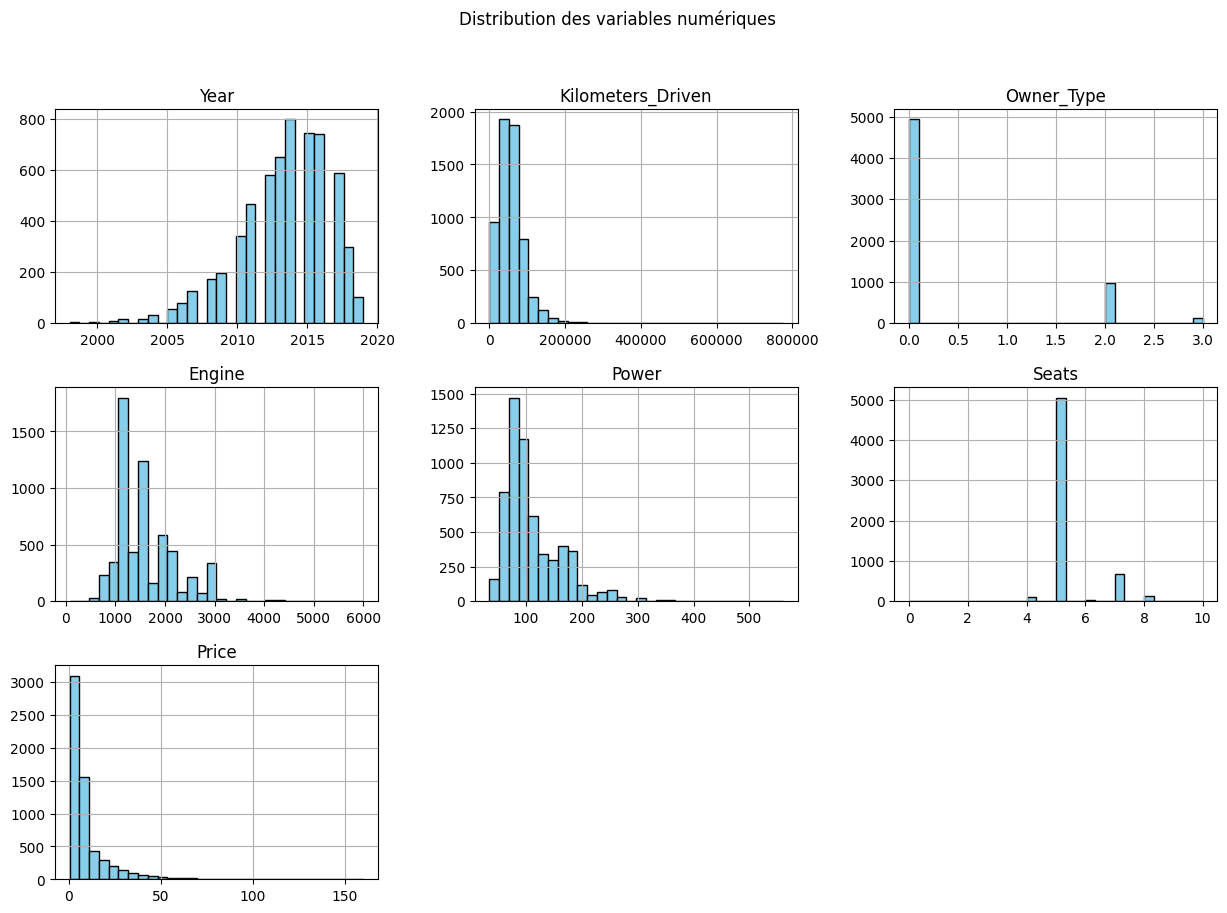

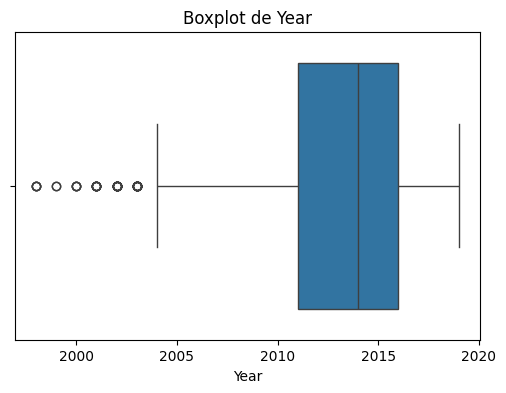

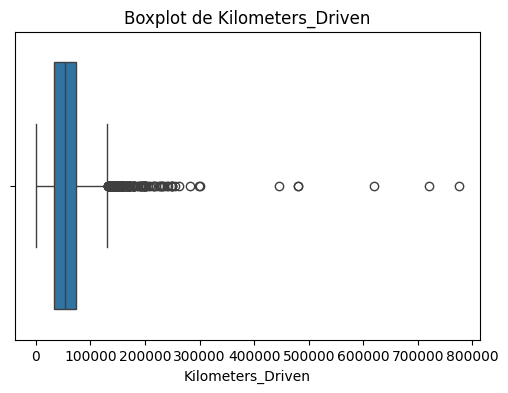

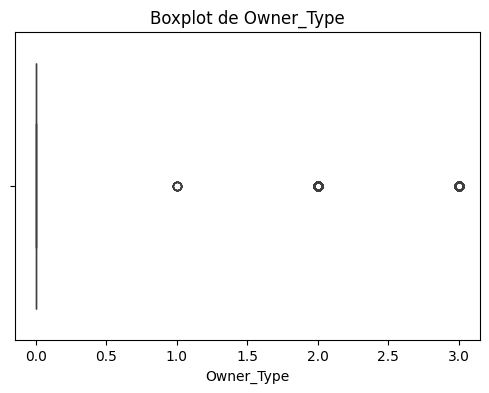

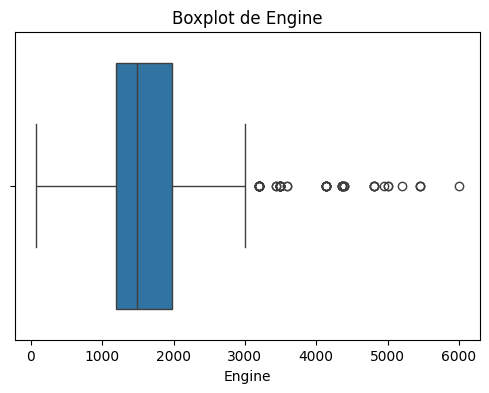

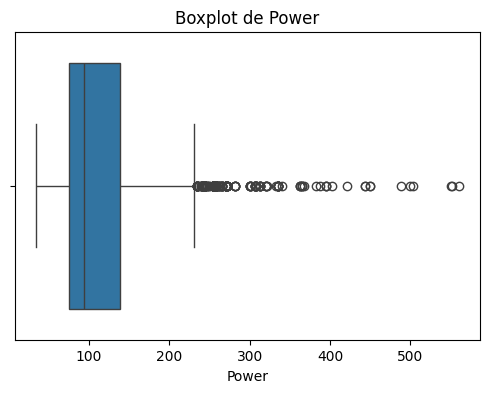

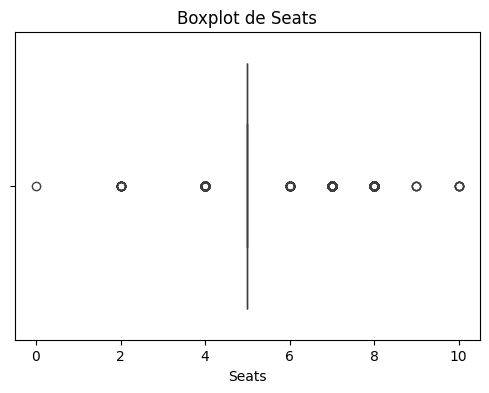

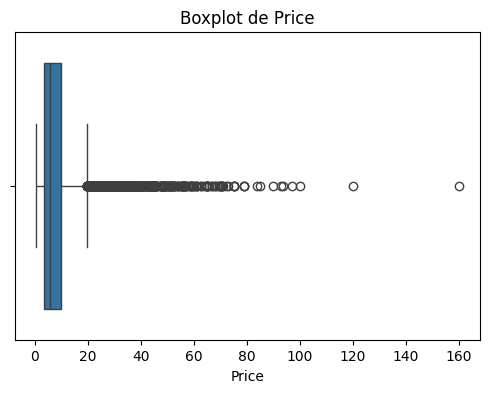

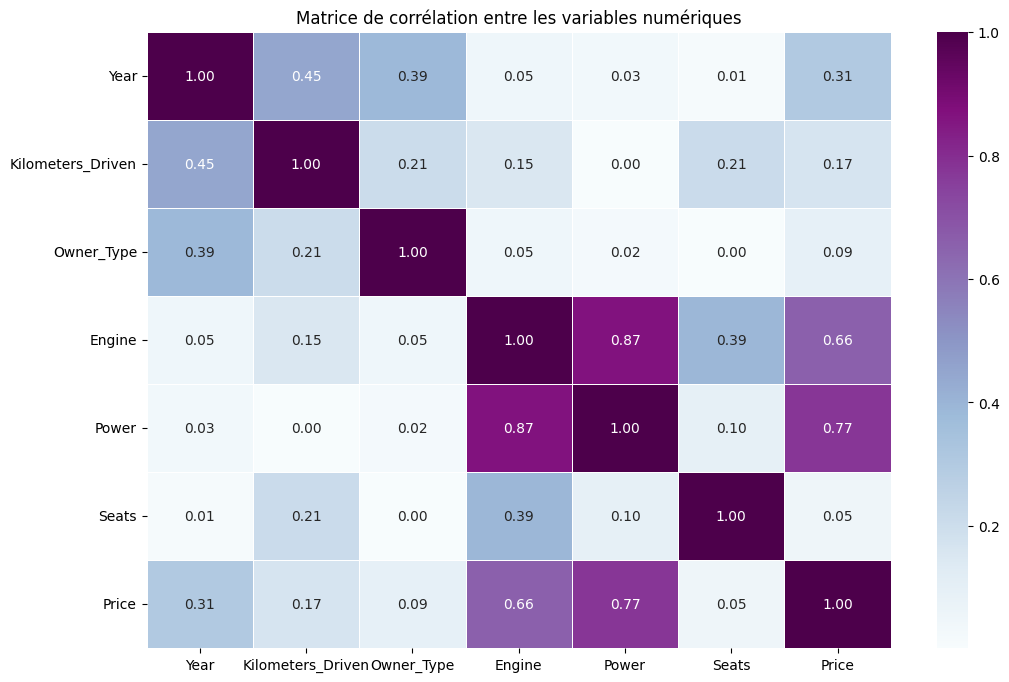

In [ ]:
#Distribution des variables numériques
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns

#Histogrammes
df[numeric_features].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribution des variables numériques')
plt.show()

#Boxplots pour vérifier les valeurs aberrantes
for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot de {feature}')
    plt.show()

#Analyse des corrélations
corr_matrix = df[numeric_features].corr().abs()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='BuPu', linewidths=0.5)
plt.title("Matrice de corrélation entre les variables numériques")
plt.show()

- 1 valeur abérante sur les kilometers_driven


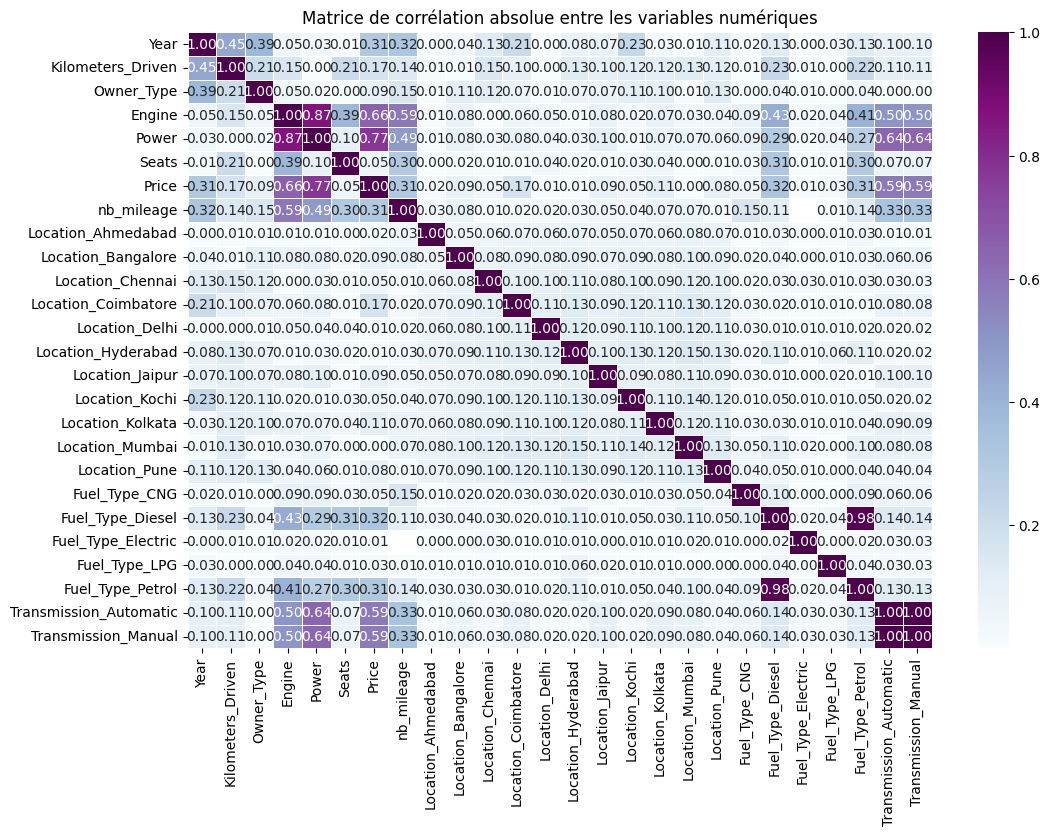

In [ ]:
# Initialiser OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Appliquer OneHotEncoder sur les colonnes spécifiées
encoded_data = encoder.fit_transform(df[['Location', 'Fuel_Type', 'Transmission']])

# Créer un DataFrame avec les colonnes encodées
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Location', 'Fuel_Type', 'Transmission']))

# Combiner avec le DataFrame original (sans les colonnes d'origine)
data_cat_encod = pd.concat([df.drop(['Location', 'Fuel_Type', 'Transmission', 'marque', 'debut_modele', 'modele_detail'], axis=1), encoded_df], axis=1)

#Analyse des corrélations
corr_matrix = data_cat_encod.corr()

# Prendre la valeur absolue de la matrice de corrélation
abs_corr_matrix = corr_matrix.abs()

# Affichage de la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(abs_corr_matrix, annot=True, fmt=".2f", cmap='BuPu', linewidths=0.5)
plt.title("Matrice de corrélation absolue entre les variables numériques")
plt.show()


- pas de corrélation avec la location (drop location)
- corrélation avec le type de carburant
- corrélation avec la transmission

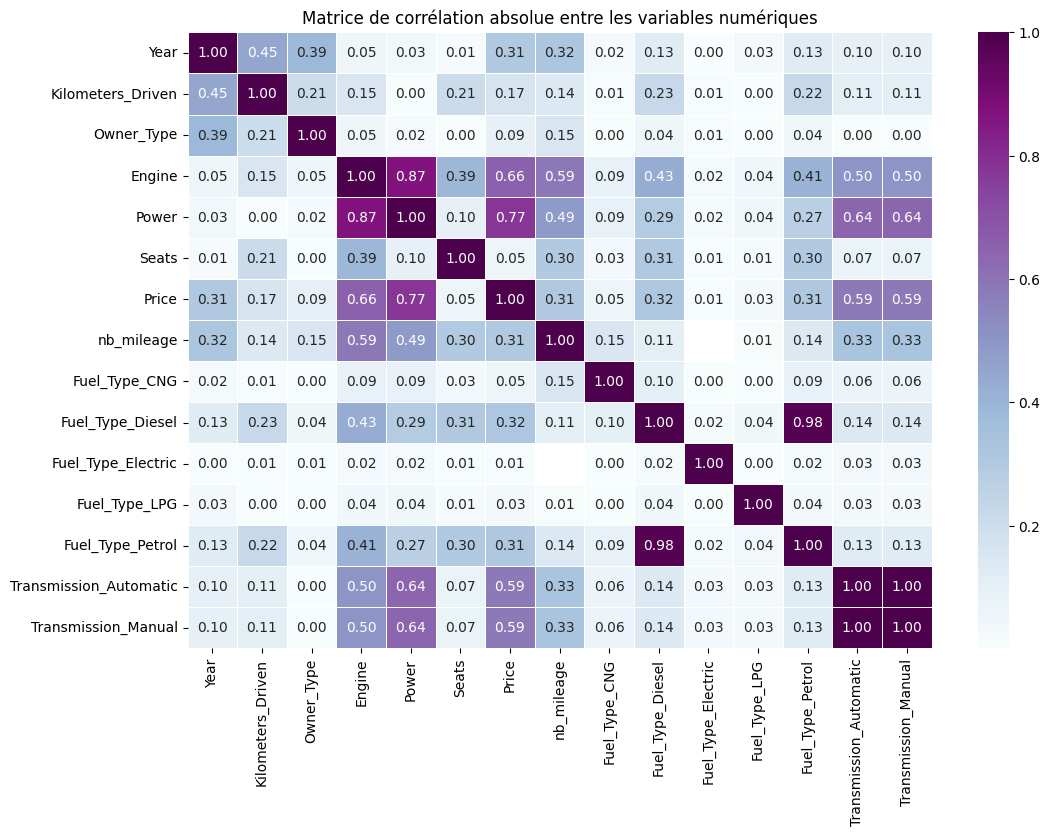

In [ ]:
# Initialiser OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Appliquer OneHotEncoder sur les colonnes spécifiées
encoded_data = encoder.fit_transform(df[['Fuel_Type', 'Transmission']])

# Créer un DataFrame avec les colonnes encodées
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Fuel_Type', 'Transmission']))

# Combiner avec le DataFrame original (sans les colonnes d'origine)
data_cat_encod = pd.concat([df.drop(['Location', 'Fuel_Type', 'Transmission', 'marque', 'debut_modele', 'modele_detail'], axis=1), encoded_df], axis=1)

#Analyse des corrélations
corr_matrix = data_cat_encod.corr()

# Prendre la valeur absolue de la matrice de corrélation
abs_corr_matrix = corr_matrix.abs()

# Affichage de la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(abs_corr_matrix, annot=True, fmt=".2f", cmap='BuPu', linewidths=0.5)
plt.title("Matrice de corrélation absolue entre les variables numériques")
plt.show()


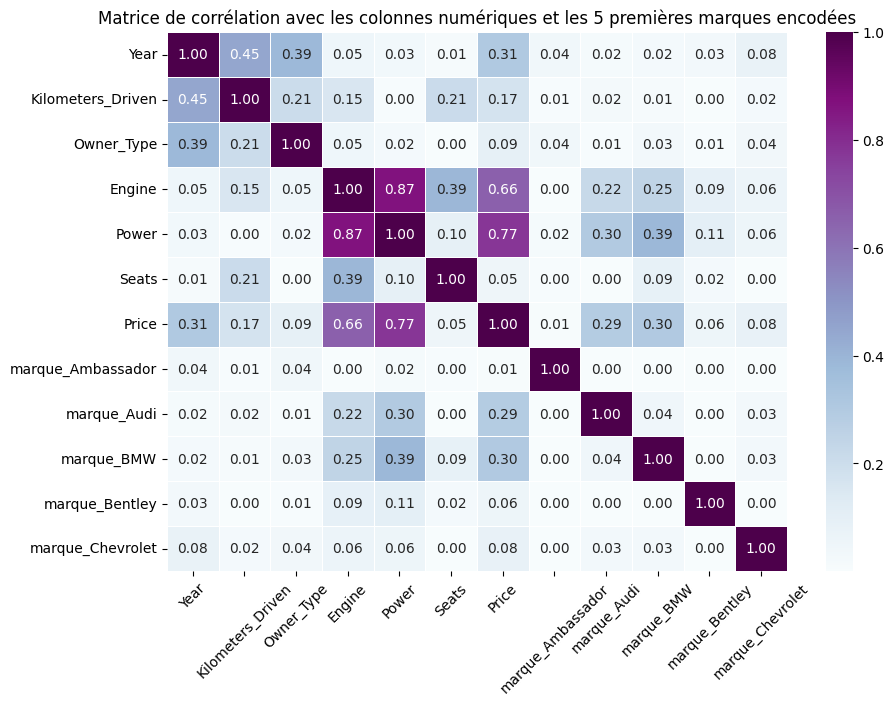

In [ ]:
# Assurer que la colonne 'marque' est bien une chaîne de caractères
df['marque'] = df['marque'].astype(str)

# Initialiser l'encodeur OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

# Appliquer l'encodage OneHotEncoder sur la colonne 'marque'
marque_encod = encoder.fit_transform(df[['marque']])  # Doubles crochets pour garder un DataFrame

# Créer un DataFrame avec les nouvelles colonnes encodées
encoded_df = pd.DataFrame(marque_encod, columns=encoder.get_feature_names_out(['marque']), index=df.index)

# Fusionner avec le DataFrame d'origine après suppression de la colonne 'marque'
data_cat_encod = pd.concat([df.drop(['marque'], axis=1), encoded_df], axis=1)

# Sélectionner les 5 premières colonnes encodées de 'marque'
selected_marque_cols = encoded_df.columns[:5]  # Prendre uniquement les 5 premières colonnes encodées

# Sélectionner toutes les colonnes numériques du DataFrame original
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns  

# Combiner les colonnes numériques et les 5 colonnes encodées de 'marque'
selected_cols = list(numeric_cols) + list(selected_marque_cols)

# Analyse des corrélations
corr_matrix = data_cat_encod[selected_cols].corr()  # Calculer la corrélation sur les colonnes sélectionnées

# Prendre la valeur absolue de la matrice de corrélation
abs_corr_matrix = corr_matrix.abs()

# Affichage de la matrice de corrélation
plt.figure(figsize=(10, 7))
sns.heatmap(abs_corr_matrix, annot=True, fmt=".2f", cmap='BuPu', linewidths=0.5)
plt.title("Matrice de corrélation avec les colonnes numériques et les 5 premières marques encodées")
plt.xticks(rotation=45)  # Rotation des labels pour lisibilité
plt.show()

In [ ]:
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,nb_mileage,marque,debut_modele,modele_detail
0,Mumbai,2010,72000,CNG,Manual,0,998.0,58.16,5.0,1.75,26.6,Maruti,Wagon,R LXI CNG
1,Pune,2015,41000,Diesel,Manual,0,1582.0,126.20,5.0,12.50,19.67,Hyundai,Creta,1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,0,1199.0,88.70,5.0,4.50,18.2,Honda,Jazz,V
3,Chennai,2012,87000,Diesel,Manual,0,1248.0,88.76,7.0,6.00,20.77,Maruti,Ertiga,VDI
4,Coimbatore,2013,40670,Diesel,Automatic,2,1968.0,140.80,5.0,17.74,15.2,Audi,A4,New 2.0 TDI Multitronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,0,1248.0,74.00,5.0,4.75,28.4,Maruti,Swift,VDI
6015,Jaipur,2015,100000,Diesel,Manual,0,1120.0,71.00,5.0,4.00,24.4,Hyundai,Xcent,1.1 CRDi S
6016,Jaipur,2012,55000,Diesel,Manual,2,2498.0,112.00,8.0,2.90,14.0,Mahindra,Xylo,D4 BSIV
6017,Kolkata,2013,46000,Petrol,Manual,0,998.0,67.10,5.0,2.65,18.9,Maruti,Wagon,R VXI


In [ ]:
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,nb_mileage,marque,debut_modele,modele_detail
0,Mumbai,2010,72000,CNG,Manual,0,998.0,58.16,5.0,1.75,26.6,Maruti,Wagon,R LXI CNG
1,Pune,2015,41000,Diesel,Manual,0,1582.0,126.20,5.0,12.50,19.67,Hyundai,Creta,1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,0,1199.0,88.70,5.0,4.50,18.2,Honda,Jazz,V
3,Chennai,2012,87000,Diesel,Manual,0,1248.0,88.76,7.0,6.00,20.77,Maruti,Ertiga,VDI
4,Coimbatore,2013,40670,Diesel,Automatic,2,1968.0,140.80,5.0,17.74,15.2,Audi,A4,New 2.0 TDI Multitronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,0,1248.0,74.00,5.0,4.75,28.4,Maruti,Swift,VDI
6015,Jaipur,2015,100000,Diesel,Manual,0,1120.0,71.00,5.0,4.00,24.4,Hyundai,Xcent,1.1 CRDi S
6016,Jaipur,2012,55000,Diesel,Manual,2,2498.0,112.00,8.0,2.90,14.0,Mahindra,Xylo,D4 BSIV
6017,Kolkata,2013,46000,Petrol,Manual,0,998.0,67.10,5.0,2.65,18.9,Maruti,Wagon,R VXI


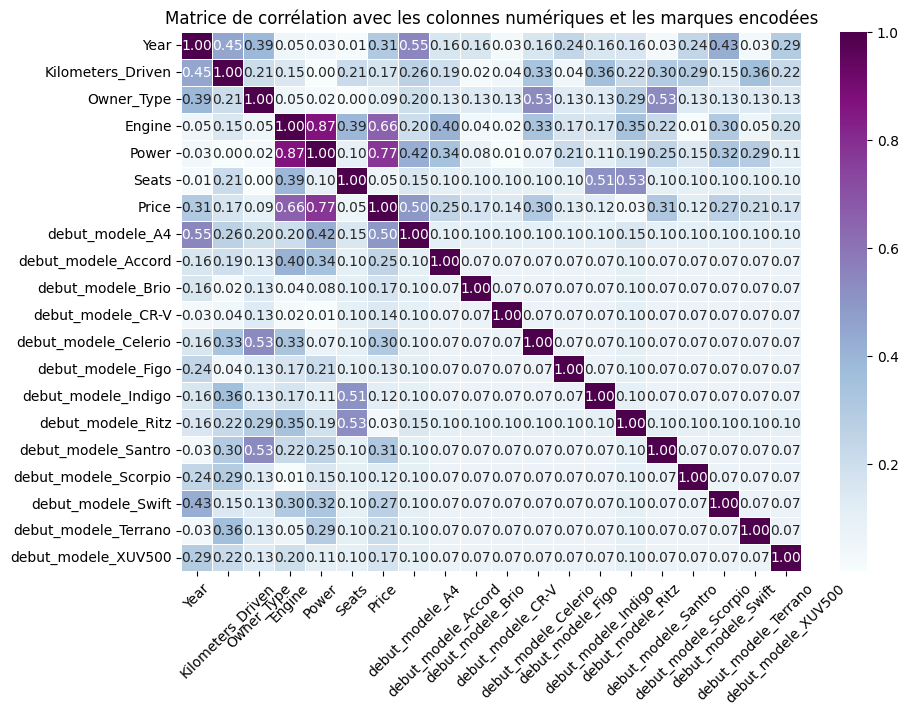

In [ ]:
# Assurer que la colonne 'debut_modele' est bien une chaîne de caractères
df['debut_modele'] = df['debut_modele'].astype(str)

# Sélectionner 5 lignes aléatoires de la colonne 'debut_modele'
random_debut_modele = df['debut_modele'].sample(n=15, random_state=42)

# Initialiser l'encodeur OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

# Appliquer l'encodage OneHotEncoder sur les 5 lignes sélectionnées de 'debut_modele'
marque_encod = encoder.fit_transform(random_debut_modele.values.reshape(-1, 1))

# Créer un DataFrame avec les nouvelles colonnes encodées
encoded_df = pd.DataFrame(marque_encod, columns=encoder.get_feature_names_out(['debut_modele']))

# Sélectionner toutes les colonnes numériques du DataFrame original
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns  

# Combiner les colonnes numériques et les nouvelles colonnes encodées de 'debut_modele'
df_combined = pd.concat([df[numeric_cols], encoded_df], axis=1)

# Analyse des corrélations
corr_matrix = df_combined.corr()  # Calculer la corrélation sur le DataFrame combiné

# Prendre la valeur absolue de la matrice de corrélation
abs_corr_matrix = corr_matrix.abs()

# Affichage de la matrice de corrélation
plt.figure(figsize=(10, 7))
sns.heatmap(abs_corr_matrix, annot=True, fmt=".2f", cmap='BuPu', linewidths=0.5)
plt.title("Matrice de corrélation avec les colonnes numériques et les marques encodées")
plt.xticks(rotation=45)  # Rotation des labels pour lisibilité
plt.show()